# Análisis univariado y multivariado

Se usarán las siguientes variables para el análisis:
* **FECHA_INICIO_ACTIVIDADES:** Muestra el inicio de actividades del contribuyente, para el análisis se pueden establecer periodos (presidenciales, municipales, etc) y obtener una relación entre aquel y la cantidad de nuevos negocios.
* **FECHA_SUSPENSION_DEFINITIVA:** Fechas en las que un negocio dejó de operar. El análisis de esta variable nos ayudará a determinar en qué periodo temporal desaparecieron negocios, con lo que podremos analizar las medidas económicas tomadas por las instituciones alrededor de aquel periodo
* **ACTIVIDAD_ECONOMICA:** Define el tipo de actividad que el contribuyente ejerce. Con esta variable podemos generar grupos y poder profundizar el análisis
* **NUMERO_ESTABLECIMIENTO:** Número secuencial. Permite  conocer  el  orden  cronológico  de  la  creación  de los establecimientos.

In [1]:
import csv  # library csv
import pandas as pd  # library pandas
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
FILE_NAME = 'Proyecto/QUITO.csv'
COLOR = "tan"

In [3]:
guayaquil = pd.read_csv(FILE_NAME, sep=',', encoding='utf-8', error_bad_lines=False, index_col=0)  # reading GUAYAQUIL file

In [4]:
guayaquil.columns

Index(['NUMERO_RUC', 'RAZON_SOCIAL', 'NOMBRE_COMERCIAL',
       'ESTADO_CONTRIBUYENTE', 'CLASE_CONTRIBUYENTE',
       'FECHA_INICIO_ACTIVIDADES', 'FECHA_ACTUALIZACION',
       'FECHA_SUSPENSION_DEFINITIVA', 'FECHA_REINICIO_ACTIVIDADES', 'OBLIGADO',
       'TIPO_CONTRIBUYENTE', 'NUMERO_ESTABLECIMIENTO',
       'NOMBRE_FANTASIA_COMERCIAL', 'CALLE', 'NUMERO', 'INTERSECCION',
       'ESTADO_ESTABLECIMIENTO', 'DESCRIPCION_PROVINCIA', 'DESCRIPCION_CANTON',
       'DESCRIPCION_PARROQUIA', 'CODIGO_CIIU', 'ACTIVIDAD_ECONOMICA'],
      dtype='object')

In [5]:
df = guayaquil.dropna(subset=['FECHA_INICIO_ACTIVIDADES'])

In [6]:
df.head()

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NOMBRE_FANTASIA_COMERCIAL,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA
ID,,,,,,,,,,,,,,,,,,,,,
0,100087626001,MOSCOSO HEREDIA RUTH ESTHELA DE LOS ANGELES,NaN,ACTIVO,OTROS,11/04/2001,20/09/2011,NaN,NaN,N,...,NaN,AV. PARIS,N40-177,GRANADOS,ABI,PICHINCHA,QUITO,IÑAQUITO,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ..."
1,100081728001,QUITO TENEMASA LUIS ANTONIO,VULCANIZADORA MAGDALENA,SUSPENDIDO,OTROS,18/05/1973,17/04/2001,13/09/2006,NaN,N,...,VULCANIZADORA MAGDALENA,CANARIS,424,DUCHICELA,CER,PICHINCHA,QUITO,LA MAGDALENA,G452001,MANTENIMIENTO Y REPARACIÓN DE VEHÍCULOS AUTOMO...
2,100086859001,LLIVISACA NAUTA MARIA ROSARIO,NaN,SUSPENDIDO,OTROS,17/10/1996,09/04/2002,31/12/2001,NaN,N,...,NaN,RIO NUEVO,S/N,PORTOVELO,CER,PICHINCHA,QUITO,CHILLOGALLO,I563002,ACTIVIDADES DE PREPARACIÓN Y SERVICIO DE BEBID...
3,100123975001,RODAS MORALES RAQUEL DEL PILAR,NaN,ACTIVO,OTROS,12/10/1992,14/07/2015,16/01/2002,16/05/2003,N,...,NaN,ANTONIO DE MARCHENA,OE1-71,AV. 10 DE AGOSTO,ABI,PICHINCHA,QUITO,SAN JUAN,P854994,OTROS TIPOS DE ENSEÑANZA N.C.P.
4,100122753001,AGUILERA TORAL MIGUEL PATRICIO,NaN,ACTIVO,OTROS,28/06/1985,17/07/2017,NaN,NaN,S,...,ELECTRONICA LOS ANDES,AV. 10 DE AGOSTO,520,CHECA,CER,PICHINCHA,QUITO,IÑAQUITO,G469000,VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...


In [7]:
df['FECHA_INICIO_ACTIVIDADES'] = pd.to_datetime(df['FECHA_INICIO_ACTIVIDADES'])
df['fecha_ano'] = df['FECHA_INICIO_ACTIVIDADES'].dt.year

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
# solo consideramos para nuestro analisis desde 1998
df_anos = df[ (1998 <=df['fecha_ano']) & (df['fecha_ano']<=2018) ]

## total de contribuyentes por año desde 1998 hasta 2018

In [9]:
# total de contribuyente para este analisis
total = float(len(df_anos))
total

1033788.0

In [10]:
tabla_x_ano = df_anos.groupby("fecha_ano").count()
tabla_x_ano["NUMERO_RUC"]

fecha_ano
1998    25935
1999    46213
2000    47521
2001    45930
2002    68274
2003    43791
2004    42926
2005    43580
2006    45129
2007    40466
2008    53358
2009    50513
2010    54925
2011    46879
2012    50990
2013    56180
2014    46891
2015    44318
2016    46149
2017    63970
2018    69850
Name: NUMERO_RUC, dtype: int64

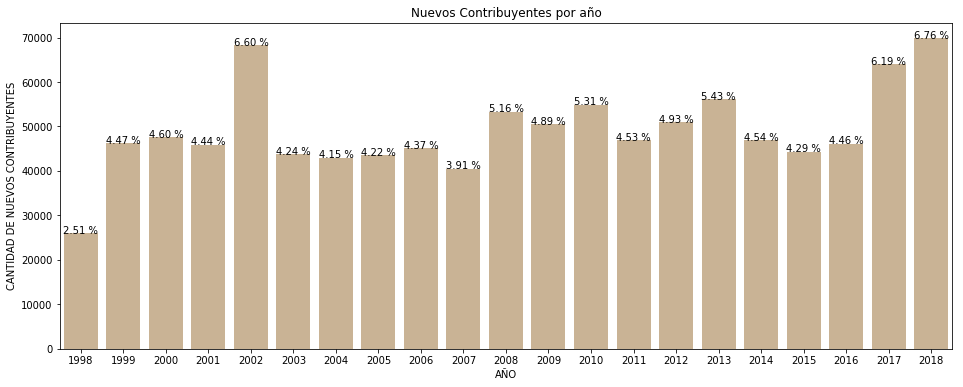

In [11]:
#nuevos contribuyentes
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='fecha_ano', data=df_anos,color=COLOR)
ax.set(ylabel='CANTIDAD DE NUEVOS CONTRIBUYENTES', xlabel="AÑO",title='Nuevos Contribuyentes por año')
total = float(len(df_anos))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total) * 100),
            ha="center")

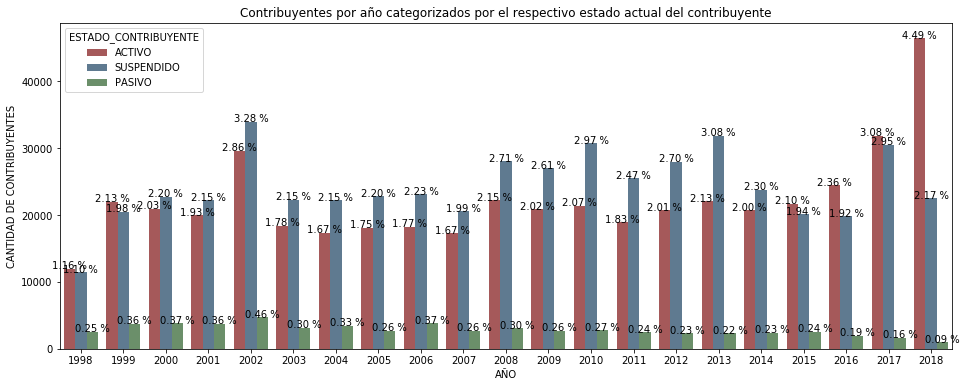

In [12]:
#contribuyentes por año deacuerdo a su estado
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='fecha_ano', data=df_anos, hue="ESTADO_CONTRIBUYENTE",palette=sns.color_palette("Set1", n_colors=3, desat=.5))
ax.set(ylabel='CANTIDAD DE CONTRIBUYENTES', xlabel="AÑO",title='Contribuyentes por año categorizados por el respectivo estado actual del contribuyente')
total = float(len(df_anos))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} %'.format((height/total) * 100),
            ha="center")

<Figure size 1152x432 with 0 Axes>

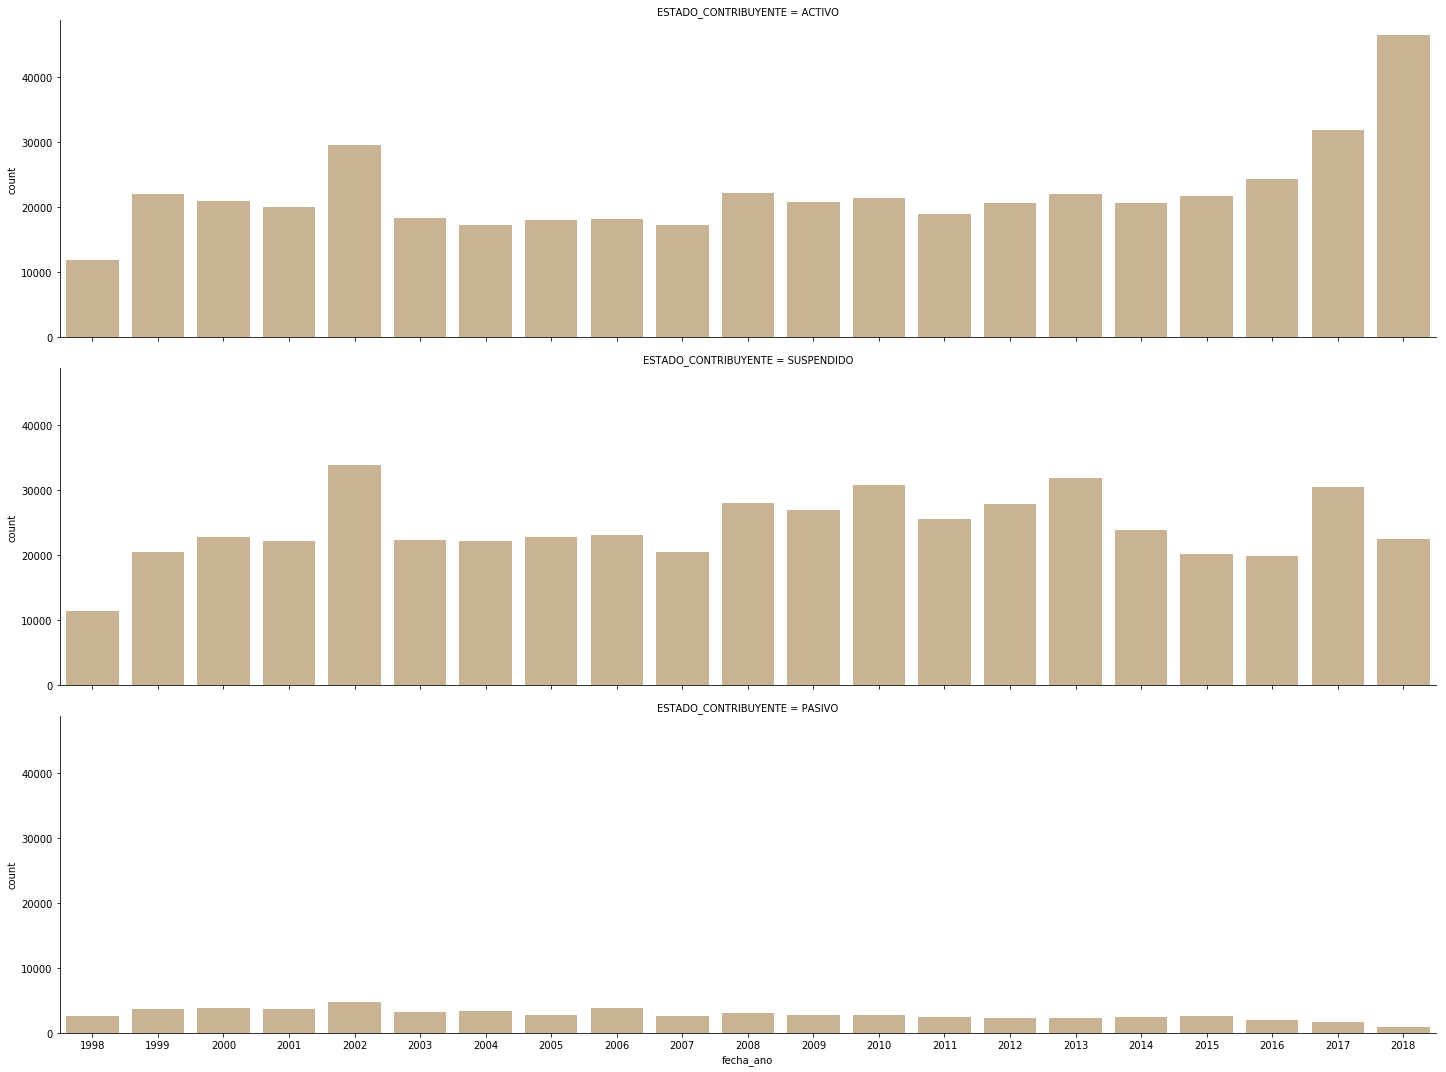

In [13]:
plt.figure(figsize=(16, 6))
ax = sns.catplot(x="fecha_ano", data=df_anos, color=COLOR,row="ESTADO_CONTRIBUYENTE",kind="count",height=5, aspect=4)
total = float(len(df_anos))

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3953
3098
4244
3474
4196
3893
3792
4259
3877
4103
4042
2999
9691
11377
6069
5549
5483
5016
4483
4963
3709
4155
4556
3223
3892
3475
4050
3444
3866
3470
3876
3686
3631
4403
3441
2557
3584
2870
4133
3225
3478
2953
3120
3570
3231
3534
3744
3024
3712
3058
3467
3705
3701
3706
3692
3694
3784
3649
3370
3388
8400
1475
2441
2599
1520
1115
1531
1185
1481
1574
1450
1164
4009
2183
2440
2806
3190
3792
5262
5243
5182
5235
3691
3180
3970
3562
4664
3886
4161
3930
3895
4139
3828
4524
3990
2972
3610
2785
4192
3432
4358
4839
3685
3951
3605
3814
3822
3036
4220
2999
3501
3873
3678
3735
3819
3437
3709
3785
3933
2891
4961
4397
4219
4417
4134
3806
4409
4405
4992
5161
4868
3589
4390
3332
4616
5143
4854
4536
4884
4751
4995
4914
4332
4178
4379
3367
4700
4306
4709
4551
4227
3948
4624
4308
3949
3445
5349
4016
4596
3349
3743
3443
3923
3707
3413
4595
3952
2805
4440
3178
4454
3614
4059
4444
4473
4346
4020
4485
18783
3674
4770
4951
4575
5004
5152
4244
4763
4931
4490
5088
4774
3438
3586
2837
3905
3460
4245
4417
4307
433

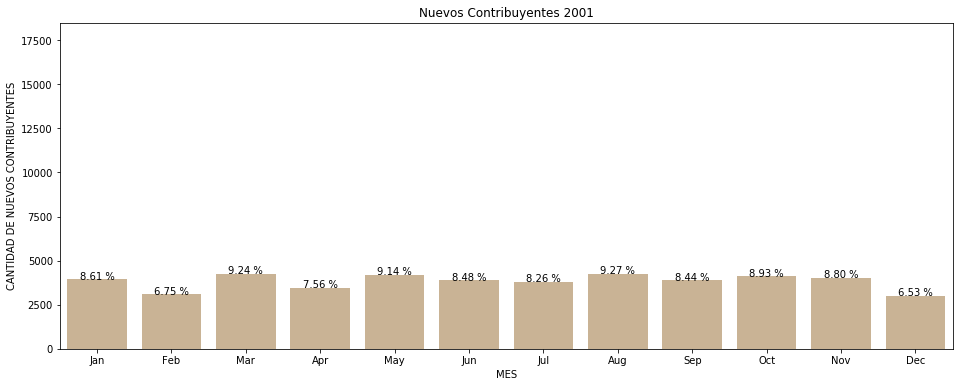

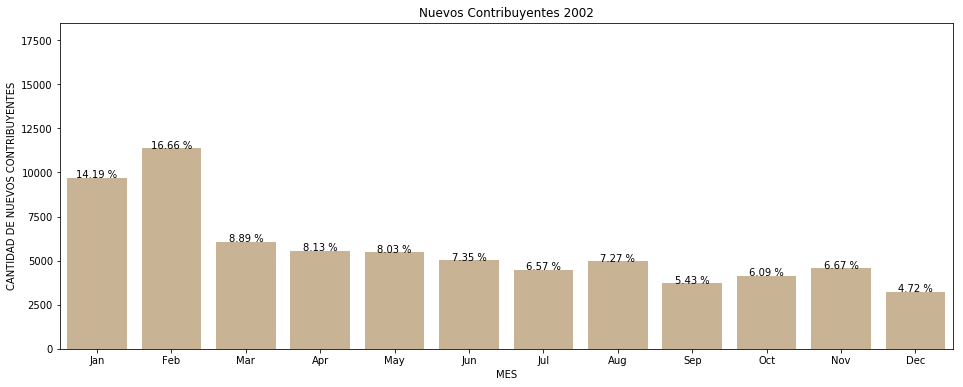

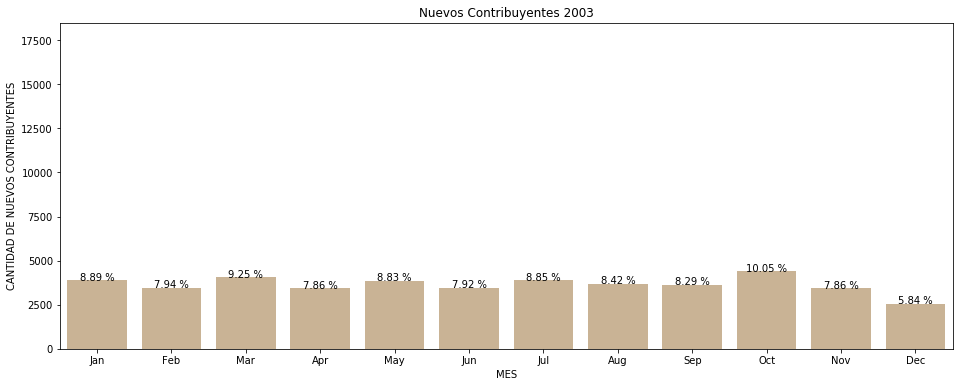

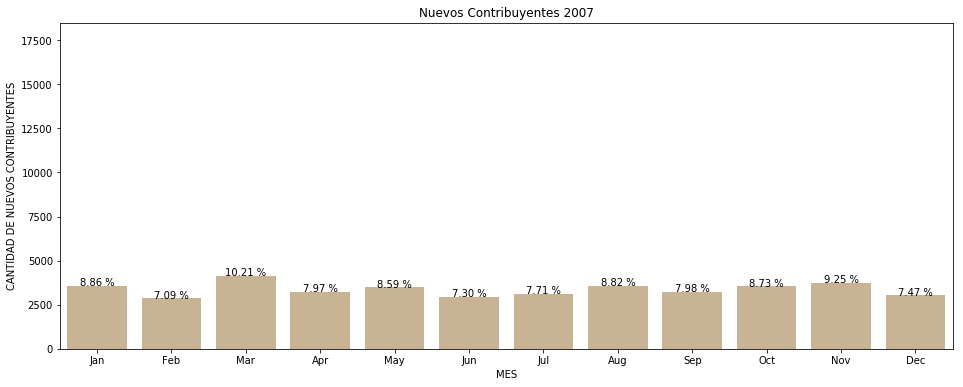

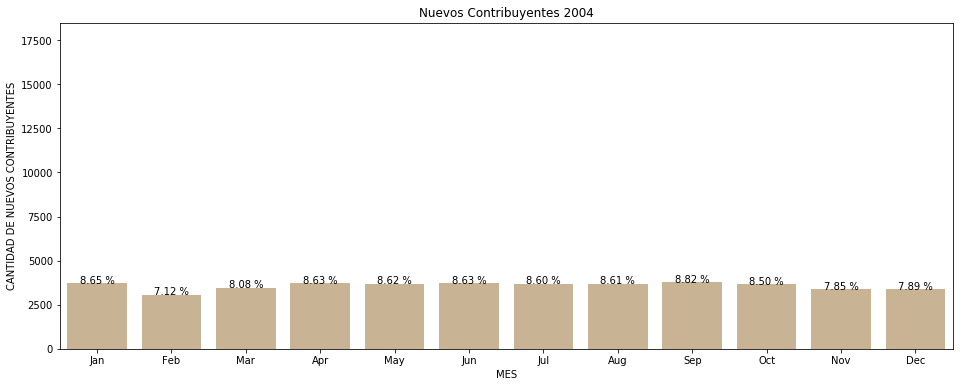

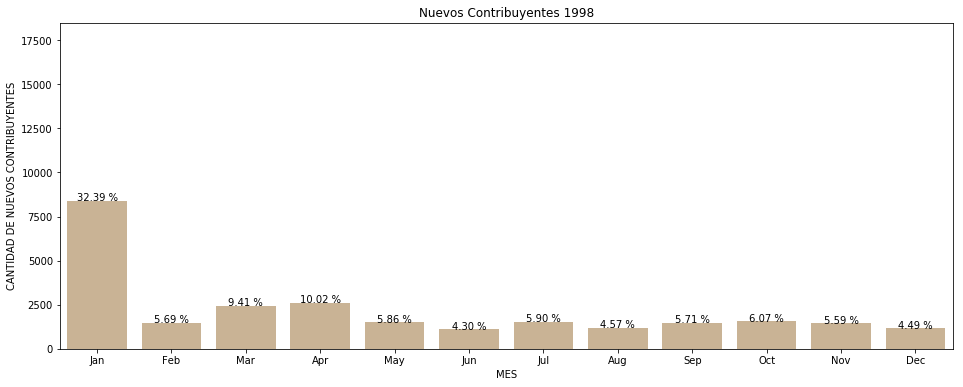

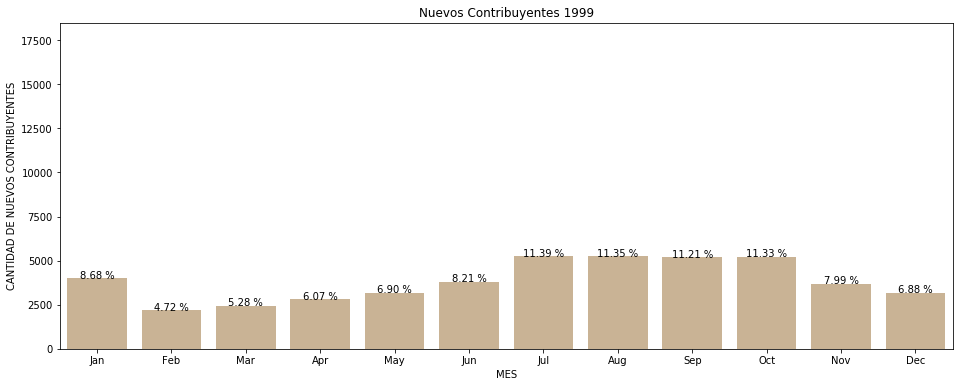

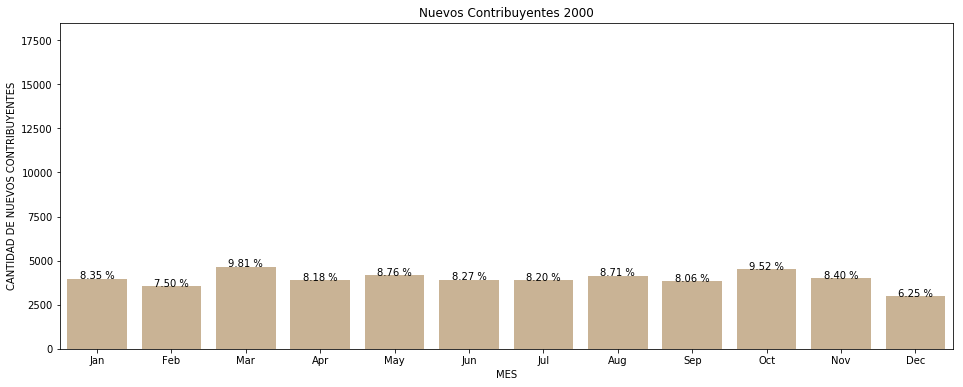

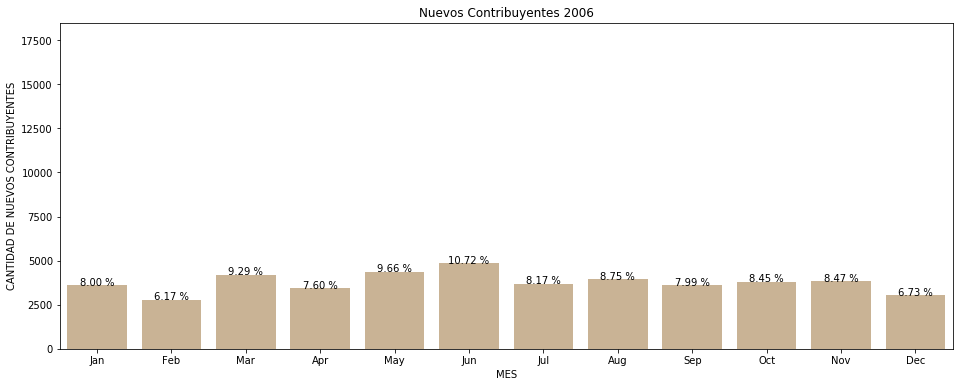

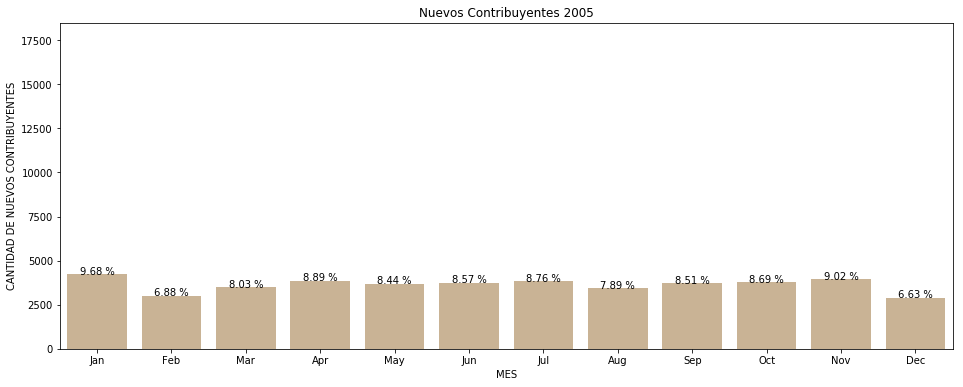

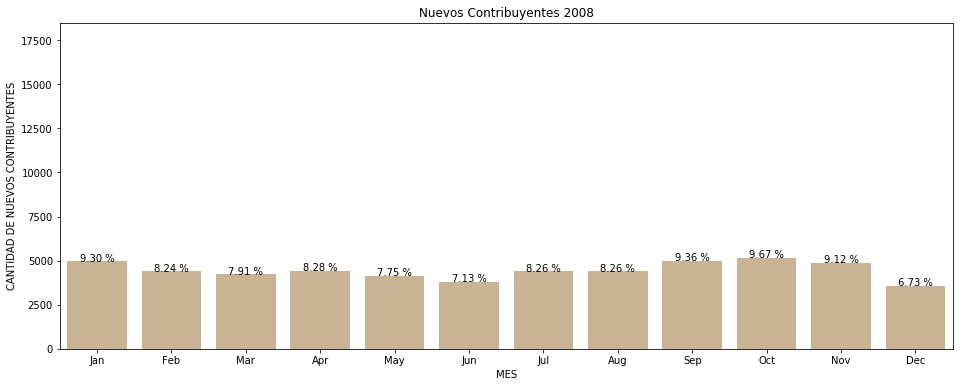

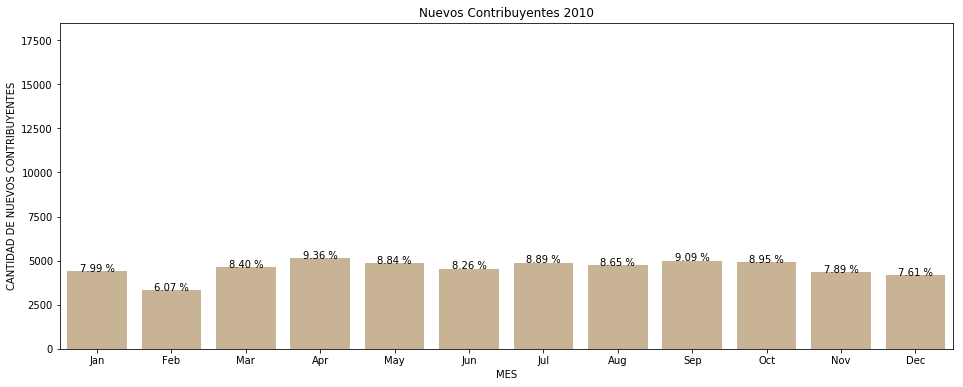

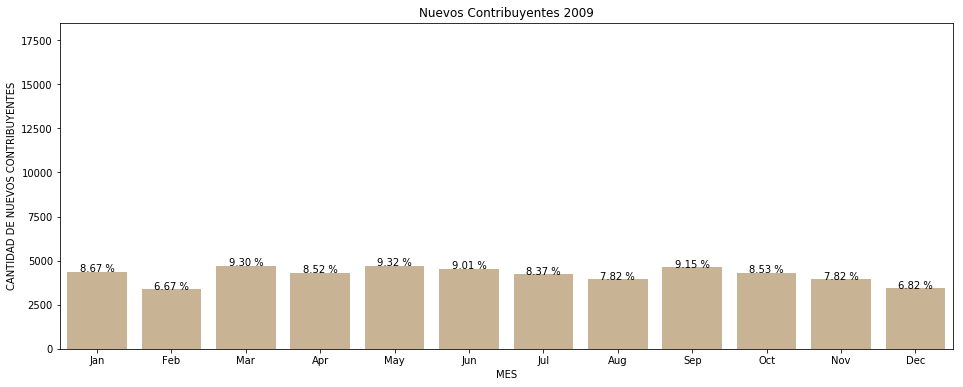

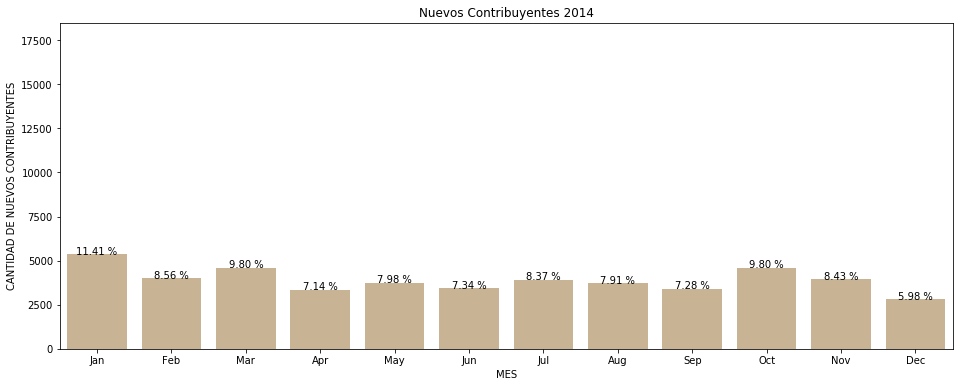

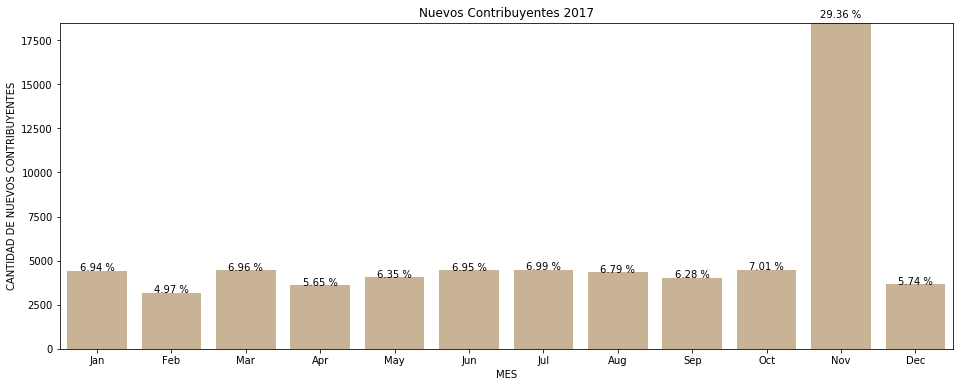

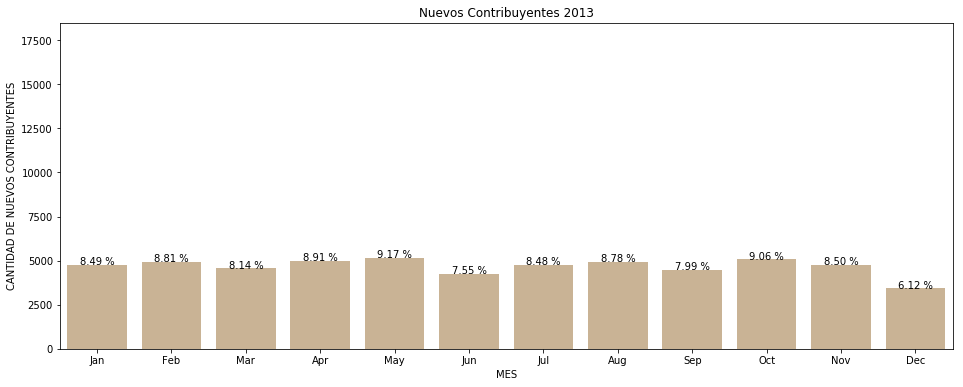

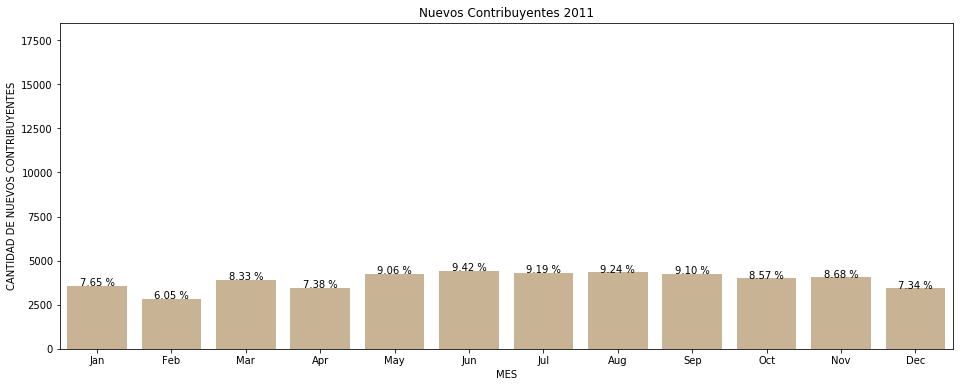

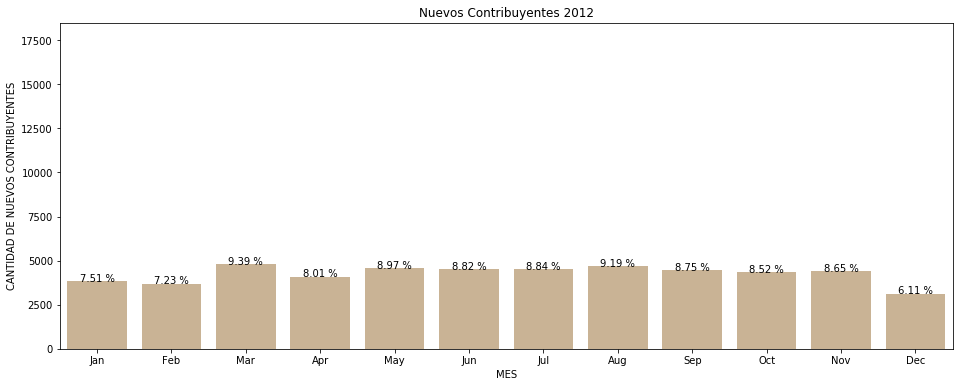

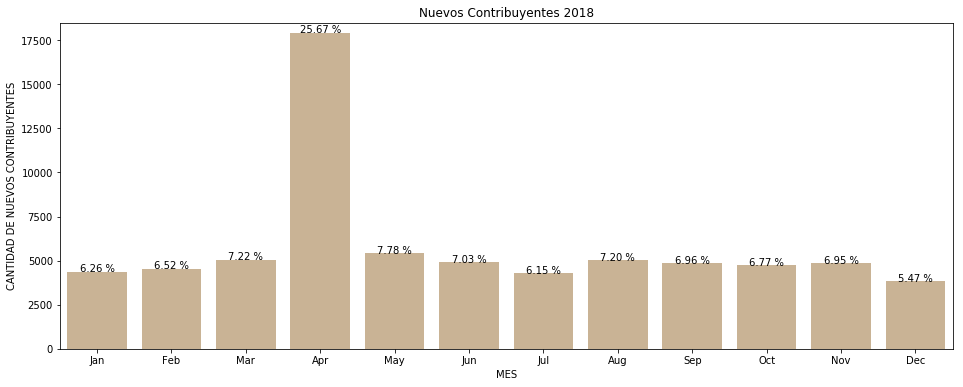

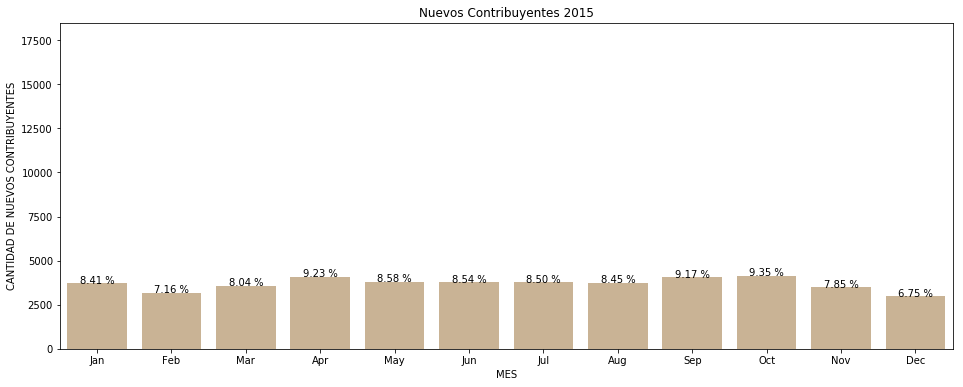

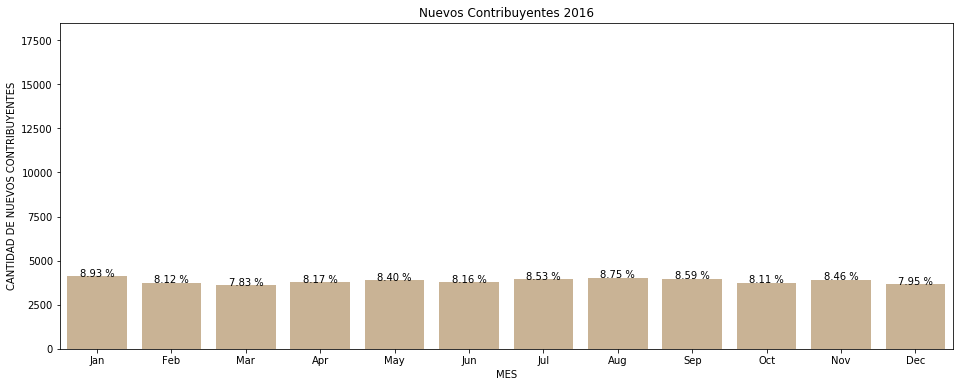

In [16]:
def por_mes(ano):
    plt.figure(figsize=(16, 6))
    df_x = df_anos[df_anos['fecha_ano']==ano ]
    ax = sns.countplot(x='fecha_mes', data=df_x,color=COLOR,order=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
    ax.set(ylabel='CANTIDAD DE NUEVOS CONTRIBUYENTES', xlabel="MES",title='Nuevos Contribuyentes ' + str(ano),ylim=(0, 18500))
    total = float(len(df_x))
    for p in ax.patches:
        print(p.get_height())
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.2f} %'.format((height/total) * 100),
        ha="center")
    plt.savefig("CONTRIBUYENTES_X_MES_"+str(ano)+".png")
def mapper(month):
    return month.strftime('%b') 
df_anos['fecha_mes'] = df_anos['FECHA_INICIO_ACTIVIDADES'].apply(mapper)
for ano in df_anos['fecha_ano'].unique().tolist():
    por_mes(ano)
#convert -delay 30 *.png animated_chart.gif

In [17]:
poblacion_x = pd.read_csv("Proyecto/factorNormalizacionQUITO.csv" ,sep=",",encoding ="utf-8",error_bad_lines=False)
poblacion_x

,DESCRIPCION_PARROQUIA,POBLACION,AREA,FACTOR,TOTAL_LOCALES
0,ALANGASI,25477,29.43,0.427837,10900
1,AMAGUAÑA,34812,56.30,0.257584,8967
2,ATAHUALPA (HABASPAMBA),2755,70.18,0.198185,546
3,CALACALI,5363,190.22,0.227485,1220
4,CALDERON (CARAPUNGO),125364,78.89,0.495677,62140
5,CARCELÉN,54978,NaN,0.695369,38230
6,CHAVEZPAMBA,1276,12.31,0.137931,176
7,CHECA (CHILPA),10926,89.56,0.177467,1939
8,CENTRO HISTÓRICO,54678,NaN,1.482991,81087
9,CHILLOGALLO,63771,NaN,1.512051,96425


In [19]:
def por_ano_parroquia(ano):
    df_x = df_anos[df_anos['fecha_ano']==ano]
    df_x_parroquia = df_x.groupby(["DESCRIPCION_PARROQUIA"]).count().reset_index()
    df_x_parroquia = df_x_parroquia[["DESCRIPCION_PARROQUIA","NUMERO_RUC"]]
    resultado = pd.merge(left=df_x_parroquia,right=poblacion_x, left_on='DESCRIPCION_PARROQUIA', right_on='DESCRIPCION_PARROQUIA',suffixes=("",""))
    resultado["cantidadNormalizada"] = resultado["NUMERO_RUC"] * resultado["FACTOR"]
    print(resultado["cantidadNormalizada"].max())
    resultado = resultado[["DESCRIPCION_PARROQUIA","cantidadNormalizada"]]
    resultado.to_csv("parroquias_"+str(ano)+".csv", header=True, encoding="utf-8", index=False)
for ano in df_anos['fecha_ano'].unique().tolist():
    por_ano_parroquia(ano)
#convert -delay 30 *.png animated_chart.gif # MAXIMO 22000

14404.557979458552
21760.34356792499
13251.692095065175
13210.965854583887
12957.21004850817
6578.85423159264
13422.036121673005
14120.683151140685
15563.689439310589
13295.551123275793
16738.484837809272
18348.737730684807
16829.335681959838
14564.330153654373
14501.674399067777
19294.839624942415
16375.081461207013
17631.329340668275
10859.140879072642
12142.685238882415
12819.367388417659


In [21]:
df_parroquias = df_anos
df_parroquias["cantidad"] = df_parroquias.groupby(["fecha_ano","DESCRIPCION_PARROQUIA"])["NUMERO_RUC"].transform(lambda x : x.count())
df_x_parroquia = df_parroquias[["DESCRIPCION_PARROQUIA","fecha_ano","FECHA_INICIO_ACTIVIDADES","cantidad"]]
df_x_parroquia.drop_duplicates(subset=["DESCRIPCION_PARROQUIA","fecha_ano","FECHA_INICIO_ACTIVIDADES"]).to_csv("por_parroquiasGuayaquil.csv", header=True, encoding="utf-8", index=False)
df_parroquias

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA,fecha_ano,fecha_mes,cantidad
ID,,,,,,,,,,,,,,,,,,,,,
0,100087626001,MOSCOSO HEREDIA RUTH ESTHELA DE LOS ANGELES,NaN,ACTIVO,OTROS,2001-11-04,20/09/2011,NaN,NaN,N,...,GRANADOS,ABI,PICHINCHA,QUITO,IÑAQUITO,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...",2001,Nov,4792
10,100149590001,ORDONEZ ORDONEZ SERGIO CLOTARIO,NaN,ACTIVO,OTROS,2002-02-14,16/11/2009,11/08/2003,11/08/2003,N,...,MACHALA,ABI,PICHINCHA,QUITO,COTOCOLLAO,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...",2002,Feb,6608
13,100291509001,ARGUDO ROMERO JULIO MARIA,NaN,ACTIVO,OTROS,2001-09-28,15/05/2017,NaN,NaN,N,...,LOS CIPRESES,ABI,PICHINCHA,QUITO,TUMBACO,M702003,"SERVICIOS DE ASESORAMIENTO, ORIENTACIÓN Y ASI...",2001,Sep,1119
15,100317684001,GUZMAN DE LA BASTIDA ANA MARIA,NaN,ACTIVO,OTROS,2001-04-25,30/01/2008,NaN,30/01/2008,N,...,AV. ELOY ALFARO,ABI,PICHINCHA,QUITO,COTOCOLLAO,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...",2001,Apr,4173
18,100011113001,CEVALLOS FAJARDO LIGIA BRIGIDA,NaN,SUSPENDIDO,OTROS,2003-09-24,24/09/2003,20/08/2004,NaN,N,...,AVENIDA ELOY ALFARO,CER,PICHINCHA,QUITO,COTOCOLLAO,B081014,EXTRACCIÓN DE CRETA Y DOLOMITA SIN CALCINAR.,2003,Sep,4150
19,100021120001,PEÑA UGALDE GENARO,NaN,SUSPENDIDO,OTROS,2001-09-13,02/08/2017,15/08/2017,02/08/2017,N,...,SECUNDARIA,CER,PICHINCHA,QUITO,NAYON,M691009,OTRAS ACTIVIDADES DE ASESORAMIENTO Y REPRESENT...,2001,Sep,232
21,100040088001,GRANDA UGALDE EDMUNDO HUMBERTO,NaN,SUSPENDIDO,OTROS,2002-04-29,NaN,13/09/2006,NaN,N,...,BRASIL,CER,PICHINCHA,QUITO,LA CONCEPCIÓN,P853002,"EDUCACIÓN DE TERCER NIVEL, DESTINADO A LA FORM...",2002,Apr,7305
22,100040146001,JERVES VAZQUEZ AUGUSTO NICOLAS RICARDO PORFIRIO M,NaN,PASIVO,OTROS,2007-04-19,01/09/2010,25/08/2011,NaN,N,...,RIO CURARAY,CER,PICHINCHA,QUITO,ALANGASI,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...",2007,Apr,375
23,100133388001,REYES CADENA FANNY ALICIA,NaN,SUSPENDIDO,OTROS,2002-10-14,NaN,18/05/2009,NaN,N,...,NaN,CER,PICHINCHA,QUITO,KENNEDY,I551009,OTROS SERVICIOS DE ALOJAMIENTOS POR CORTO TIEM...,2002,Oct,2215


### Discretizando los datos - Nuevos contribuyentes
Creamos una columna `PRESIDENTE` que determina el presidente durante el periodo de tiempo en que han registrado nuevos contribuyentes

In [22]:
mahuad_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(1998,8,10)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2000,1,22))].assign(PRESIDENTE='Jamil Mahuad')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [23]:
gn_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2000,1,22)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2003,1,5))].assign(PRESIDENTE='Gustavo Noboa')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [24]:
guti_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2003,1,5)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2005,4,20))].assign(PRESIDENTE='Lucio Gutiérrez')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [25]:
pala_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2005,4,20)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2007,1,15))].assign(PRESIDENTE='Alfredo Palacio')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [26]:
rc1_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2007,1,15)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2009,8,10))].assign(PRESIDENTE='Rafael Correa P1')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [27]:
rc2_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2009,8,10)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2013,5,24))].assign(PRESIDENTE='Rafael Correa P2')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [28]:
rc3_per_ini = df[(df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2013,5,24)) & (df['FECHA_INICIO_ACTIVIDADES'] < datetime.date(2017,5,24))].assign(PRESIDENTE='Rafael Correa P3')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [29]:
lenin_per_ini = df[df['FECHA_INICIO_ACTIVIDADES'] > datetime.date(2017,5,24)].assign(PRESIDENTE='Lenín Moreno')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [30]:
lenin_per_ini.head()

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA,fecha_ano,PRESIDENTE
ID,,,,,,,,,,,,,,,,,,,,,
480552,100791011001,FAJARDO LOPEZ LAURO BENJAMIN,NaN,ACTIVO,RISE,2017-11-27,14/05/2018,NaN,14/05/2018,N,...,59,NaN,ABI,PICHINCHA,QUITO,AMAGUAÑA,G466922,VENTA AL POR MAYOR DEL PAPEL Y CARTÓN.,2017,Lenín Moreno
486829,102606928001,CALDERON COELLO JUANA CATALINA,NaN,ACTIVO,OTROS,2018-09-07,NaN,NaN,NaN,N,...,S/N,JAMES COLNET,ABI,PICHINCHA,QUITO,RUMIPAMBA,P853002,"EDUCACIÓN DE TERCER NIVEL, DESTINADO A LA FORM...",2018,Lenín Moreno
504326,100976810001,SALCEDO CORDERO ELVIA CUMANDA,NaN,ACTIVO,OTROS,2018-08-13,NaN,NaN,NaN,N,...,O3E,ELOY ALFARO,ABI,PICHINCHA,QUITO,JIPIJAPA,G477111,VENTA AL POR MENOR DE PRENDAS DE VESTIR Y PELE...,2018,Lenín Moreno
506347,1792729912001,EQUINOCCIO-CAPACITACIONES CIA.LTDA.,EQUINOCCIO CAPACITACIONES,ACTIVO,OTROS,2017-12-01,NaN,NaN,NaN,S,...,N57-77,S/N,ABI,PICHINCHA,QUITO,QUITO DISTRITO METROPOLITANO,P854911,ACTIVIDADES DE ENSEÑANZA QUE NO PUEDE ASIGNARS...,2017,Lenín Moreno
506348,1792729912001,EQUINOCCIO-CAPACITACIONES CIA.LTDA.,EQUINOCCIO CAPACITACIONES,ACTIVO,OTROS,2017-12-01,NaN,NaN,NaN,S,...,N57-77,S/N,ABI,PICHINCHA,QUITO,QUITO DISTRITO METROPOLITANO,P854911,ACTIVIDADES DE ENSEÑANZA QUE NO PUEDE ASIGNARS...,2017,Lenín Moreno


In [31]:
cdf = pd.concat([mahuad_per_ini, gn_per_ini, guti_per_ini, pala_per_ini, rc1_per_ini, rc2_per_ini, rc3_per_ini, lenin_per_ini])

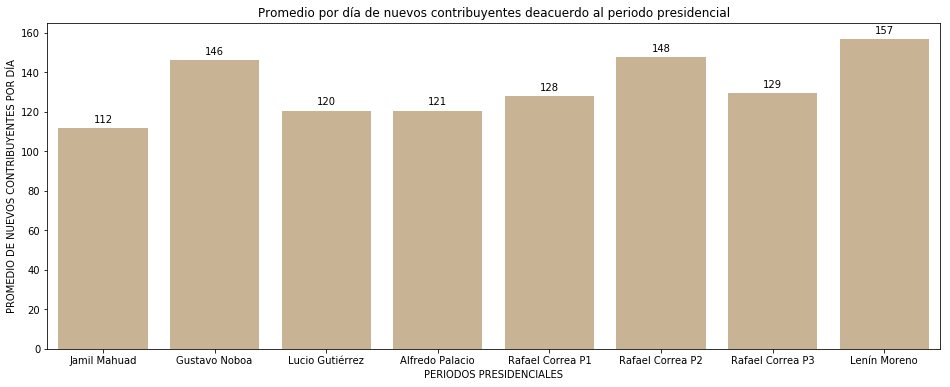

In [33]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='PRESIDENTE', data=cdf,color=COLOR)
ax.set(ylabel='PROMEDIO DE NUEVOS CONTRIBUYENTES POR DÍA',xlabel="PERIODOS PRESIDENCIALES", title='Promedio por día de nuevos contribuyentes deacuerdo al periodo presidencial',ylim=(0, 165))
total = float(len(cdf))
dias_x_periodo = [780,1461,1322,969,635,826,1089,498]  # jm - lenin  --
uso_nuevos = dias_x_periodo.copy()
for p in ax.patches:
    dias = uso_nuevos.pop()
    p.set_height(p.get_height()/dias)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

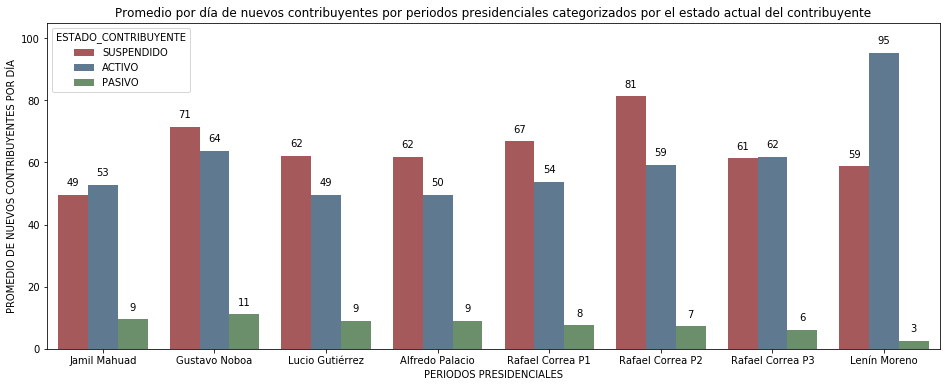

In [36]:
plt.figure(figsize=(16, 6))
dias_x_periodo = [780,1461,1322,969,635,826,1089,498,780,1461,1322,969,635,826,1089,498,780,1461,1322,969,635,826,1089,498]  # jm - lenin  --
uso_nuevos = dias_x_periodo.copy()
ax = sns.countplot(x='PRESIDENTE', data=cdf, hue="ESTADO_CONTRIBUYENTE",palette=sns.color_palette("Set1", n_colors=3, desat=.5))
ax.set(ylabel='PROMEDIO DE NUEVOS CONTRIBUYENTES POR DÍA',xlabel="PERIODOS PRESIDENCIALES", title='Promedio por día de nuevos contribuyentes por periodos presidenciales categorizados por el estado actual del contribuyente',ylim=(0, 105))
total = float(len(cdf))
for p in ax.patches:
    dias = uso_nuevos.pop()
    p.set_height(p.get_height()/dias)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

In [37]:
df2 = guayaquil.dropna(subset=['FECHA_SUSPENSION_DEFINITIVA'])

In [38]:
df2

,NUMERO_RUC,RAZON_SOCIAL,NOMBRE_COMERCIAL,ESTADO_CONTRIBUYENTE,CLASE_CONTRIBUYENTE,FECHA_INICIO_ACTIVIDADES,FECHA_ACTUALIZACION,FECHA_SUSPENSION_DEFINITIVA,FECHA_REINICIO_ACTIVIDADES,OBLIGADO,...,NOMBRE_FANTASIA_COMERCIAL,CALLE,NUMERO,INTERSECCION,ESTADO_ESTABLECIMIENTO,DESCRIPCION_PROVINCIA,DESCRIPCION_CANTON,DESCRIPCION_PARROQUIA,CODIGO_CIIU,ACTIVIDAD_ECONOMICA
ID,,,,,,,,,,,,,,,,,,,,,
1,100081728001,QUITO TENEMASA LUIS ANTONIO,VULCANIZADORA MAGDALENA,SUSPENDIDO,OTROS,18/05/1973,17/04/2001,13/09/2006,NaN,N,...,VULCANIZADORA MAGDALENA,CANARIS,424,DUCHICELA,CER,PICHINCHA,QUITO,LA MAGDALENA,G452001,MANTENIMIENTO Y REPARACIÓN DE VEHÍCULOS AUTOMO...
2,100086859001,LLIVISACA NAUTA MARIA ROSARIO,NaN,SUSPENDIDO,OTROS,17/10/1996,09/04/2002,31/12/2001,NaN,N,...,NaN,RIO NUEVO,S/N,PORTOVELO,CER,PICHINCHA,QUITO,CHILLOGALLO,I563002,ACTIVIDADES DE PREPARACIÓN Y SERVICIO DE BEBID...
3,100123975001,RODAS MORALES RAQUEL DEL PILAR,NaN,ACTIVO,OTROS,12/10/1992,14/07/2015,16/01/2002,16/05/2003,N,...,NaN,ANTONIO DE MARCHENA,OE1-71,AV. 10 DE AGOSTO,ABI,PICHINCHA,QUITO,SAN JUAN,P854994,OTROS TIPOS DE ENSEÑANZA N.C.P.
10,100149590001,ORDONEZ ORDONEZ SERGIO CLOTARIO,NaN,ACTIVO,OTROS,14/02/2002,16/11/2009,11/08/2003,11/08/2003,N,...,NaN,CRISTOBAL VACA DE CASTRO,OE5-233,MACHALA,ABI,PICHINCHA,QUITO,COTOCOLLAO,L682002,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ..."
11,100207596001,SIGSI MARQUEZ JUAN RODRIGO,NaN,SUSPENDIDO,OTROS,03/10/1997,25/03/2002,13/07/2010,NaN,N,...,EN LA COOP DE TAXIS SAN BLAS #6,PEDRO FERMIN CEVALLOS,SN,ANTEPARA,CER,PICHINCHA,QUITO,CENTRO HISTÓRICO,H492202,SERVICIOS DE TAXIS.
12,100267400001,ENCALADA ESPINOZA RAQUEL MARIA,LA NUEVA JOYERIA,SUSPENDIDO,OTROS,10/04/1973,18/10/1994,11/11/2008,NaN,N,...,LA NUEVA JOYERIA,BOLIVAR,420,GARCIA MORENO,CER,PICHINCHA,QUITO,CENTRO HISTÓRICO,S952301,REPARACIÓN Y MANTENIMIENTO DE CALZADO: ZAPATOS...
14,100347616001,ZHUNIO AUQUILLA ANGEL SEVERO,NaN,SUSPENDIDO,OTROS,12/05/1997,NaN,13/09/2006,NaN,N,...,NaN,OLAN SOLANDA SUPER MZ 2 PASAJE,S/N,NaN,CER,PICHINCHA,QUITO,CHILLOGALLO,G463011,VENTA AL POR MAYOR DE BANANO Y PLÁTANO.
16,100523612001,VERA VERA ROSA ELVIRA,VIVERES IBERIA,SUSPENDIDO,OTROS,29/08/1975,01/08/2002,30/04/2002,NaN,N,...,VIVERES IBERIA,RAFAEL TROYA,336,PADRE ALMEIDA,CER,PICHINCHA,QUITO,CENTRO HISTÓRICO,G471101,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
17,100416478001,LOPEZ HERMIDA JULIA CARMELINA,RESTAURANTE FORTIN,SUSPENDIDO,OTROS,01/12/1977,11/06/1996,28/02/1996,NaN,N,...,RESTAURANTE FORTIN,MEJIA,650,CUENCA,CER,PICHINCHA,QUITO,CENTRO HISTÓRICO,I561001,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE..."


In [39]:
df2['FECHA_SUSPENSION_DEFINITIVA'] = pd.to_datetime(df2['FECHA_SUSPENSION_DEFINITIVA'])

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
mahuad_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(1998,8,10)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2000,1,22))].assign(PRESIDENTE='Jamil Mahuad')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [41]:
gn_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2000,1,22)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2003,1,5))].assign(PRESIDENTE='Gustavo Noboa')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [42]:
guti_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2003,1,5)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2005,4,20))].assign(PRESIDENTE='Lucio Gutiérrez')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [43]:
pala_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2005,4,20)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2007,1,15))].assign(PRESIDENTE='Alfredo Palacio')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [44]:
rc1_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2007,1,15)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2009,8,10))].assign(PRESIDENTE='Rafael Correa P1')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [45]:
rc2_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2009,8,10)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2013,5,24))].assign(PRESIDENTE='Rafael Correa P2')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [46]:
rc3_susp = df2[(df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2013,5,24)) & (df2['FECHA_SUSPENSION_DEFINITIVA'] < datetime.date(2017,5,24))].assign(PRESIDENTE='Rafael Correa P3')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [47]:
lenin_susp = df2[df2['FECHA_SUSPENSION_DEFINITIVA'] > datetime.date(2017,5,24)].assign(PRESIDENTE='Lenín Moreno')

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [48]:
cdf2 = pd.concat([mahuad_susp,gn_susp, guti_susp, pala_susp, rc1_susp, rc2_susp, rc3_susp, lenin_susp])

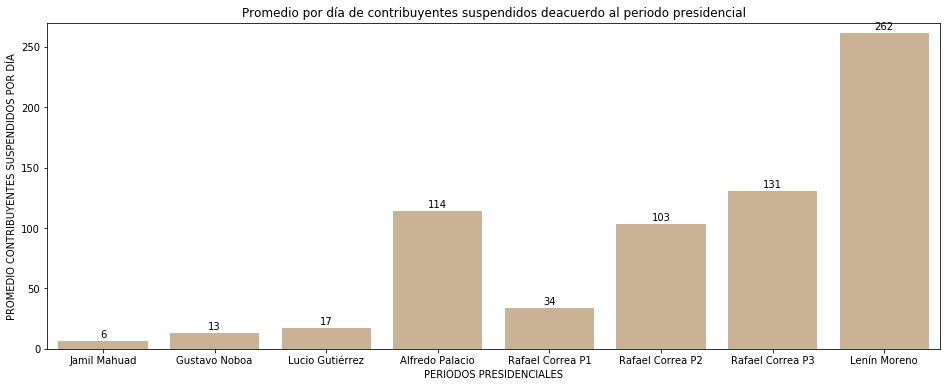

In [50]:
plt.figure(figsize=(16, 6))
dias_x_periodo = [780,1461,1322,969,635,826,1089,498]  # jm - lenin  --
ax = sns.countplot(x='PRESIDENTE', data=cdf2,color=COLOR)
ax.set(ylabel='PROMEDIO CONTRIBUYENTES SUSPENDIDOS POR DÍA', xlabel="PERIODOS PRESIDENCIALES",title='Promedio por día de contribuyentes suspendidos deacuerdo al periodo presidencial',ylim=(0, 270))
total = float(len(cdf))
for p in ax.patches:
    dias = dias_x_periodo.pop()
    p.set_height(p.get_height()/dias)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")

### Cantidad de establecimientos por tipo de actividad

In [51]:
df3 = guayaquil.dropna(subset=['ACTIVIDAD_ECONOMICA'])

In [215]:
len(df3['ACTIVIDAD_ECONOMICA'].unique())

1626

In [52]:
top10 = df3.groupby('ACTIVIDAD_ECONOMICA').size().to_frame('cantidad').sort_values(['cantidad'], ascending=False).reset_index()[:11]
top10['ACTIVIDAD_ECONOMICA_MIN'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:25], axis=1)
top10['ACTIVIDAD_ECONOMICA'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:55], axis=1)

0     ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEA...
1     VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...
2     RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...
3     OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y...
4     INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...
5     INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, M...
6                                   SERVICIOS DE TAXIS.
7                        SIN ACTIVIDAD ECONOMICA - CIIU
8     OTRAS ACTIVIDADES DE CONTABILIDAD, TENEDURÍA D...
9     VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN E...
10    CONSTRUCCIÓN DE TODO TIPO DE EDIFICIOS RESIDEN...
Name: ACTIVIDAD_ECONOMICA, dtype: object

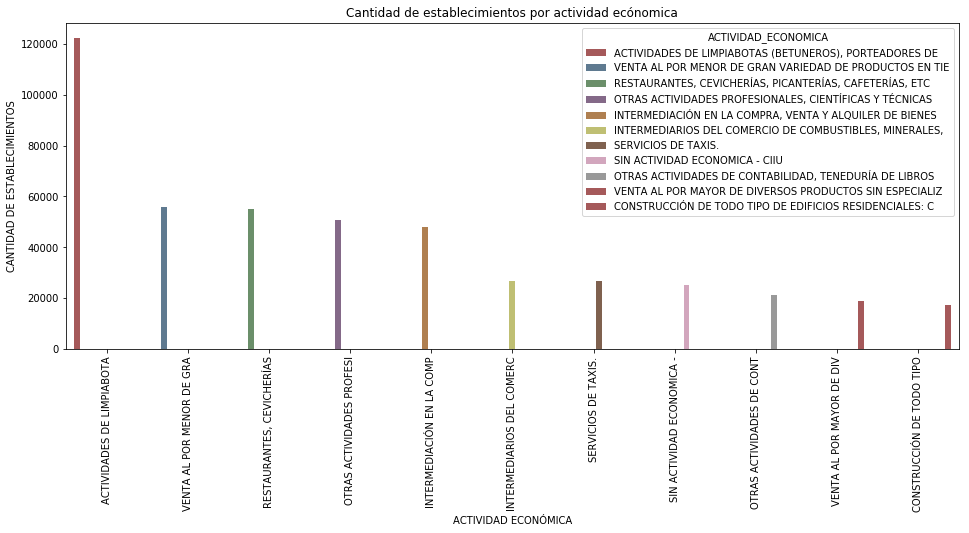

In [53]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA_MIN', data=top10,hue="ACTIVIDAD_ECONOMICA",palette=sns.color_palette("Set1", n_colors=10, desat=.5))
ax.set(ylabel='CANTIDAD DE ESTABLECIMIENTOS',xlabel="ACTIVIDAD ECONÓMICA", title='Cantidad de establecimientos por actividad ecónomica')
ax.set_xticklabels(labels=top10['ACTIVIDAD_ECONOMICA_MIN'],rotation=90)
top10["ACTIVIDAD_ECONOMICA"][:]

### Cantidad de contribuyentes por actividad

In [54]:
cont_act = df3[['ACTIVIDAD_ECONOMICA', 'NUMERO_RUC']].groupby(['ACTIVIDAD_ECONOMICA'])

In [55]:
top10_cont = cont_act['NUMERO_RUC'].nunique().to_frame('cantidad').sort_values('cantidad', ascending=False).reset_index()[:11]
top10_cont['ACTIVIDAD_ECONOMICA_MIN'] = top10_cont.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:25], axis=1)
top10_cont['ACTIVIDAD_ECONOMICA'] = top10_cont.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:50], axis=1)

In [56]:
top10_cont

,ACTIVIDAD_ECONOMICA,cantidad,ACTIVIDAD_ECONOMICA_MIN
0,"ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEA...",113959,ACTIVIDADES DE LIMPIABOTA
1,VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCT...,50560,VENTA AL POR MENOR DE GRA
2,"OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y...",45966,OTRAS ACTIVIDADES PROFESI
3,"RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETE...",44996,"RESTAURANTES, CEVICHERÍAS"
4,"INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER ...",38971,INTERMEDIACIÓN EN LA COMP
5,SIN ACTIVIDAD ECONOMICA - CIIU,25064,SIN ACTIVIDAD ECONOMICA -
6,"INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, M...",23174,INTERMEDIARIOS DEL COMERC
7,SERVICIOS DE TAXIS.,23147,SERVICIOS DE TAXIS.
8,"OTRAS ACTIVIDADES DE CONTABILIDAD, TENEDURÍA D...",18127,OTRAS ACTIVIDADES DE CONT
9,CONSTRUCCIÓN DE TODO TIPO DE EDIFICIOS RESIDEN...,16346,CONSTRUCCIÓN DE TODO TIPO


[Text(0, 0, 'ACTIVIDADES DE LIMPIABOTAS (BETUNEROS), PORTEADORE'),
 Text(0, 0, 'VENTA AL POR MENOR DE GRAN VARIEDAD DE PRODUCTOS E'),
 Text(0, 0, 'OTRAS ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉC'),
 Text(0, 0, 'RESTAURANTES, CEVICHERÍAS, PICANTERÍAS, CAFETERÍAS'),
 Text(0, 0, 'INTERMEDIACIÓN EN LA COMPRA, VENTA Y ALQUILER DE B'),
 Text(0, 0, 'SIN ACTIVIDAD ECONOMICA - CIIU'),
 Text(0, 0, 'INTERMEDIARIOS DEL COMERCIO DE COMBUSTIBLES, MINER'),
 Text(0, 0, 'SERVICIOS DE TAXIS.'),
 Text(0, 0, 'OTRAS ACTIVIDADES DE CONTABILIDAD, TENEDURÍA DE LI'),
 Text(0, 0, 'CONSTRUCCIÓN DE TODO TIPO DE EDIFICIOS RESIDENCIAL'),
 Text(0, 0, 'VENTA AL POR MAYOR DE DIVERSOS PRODUCTOS SIN ESPEC')]

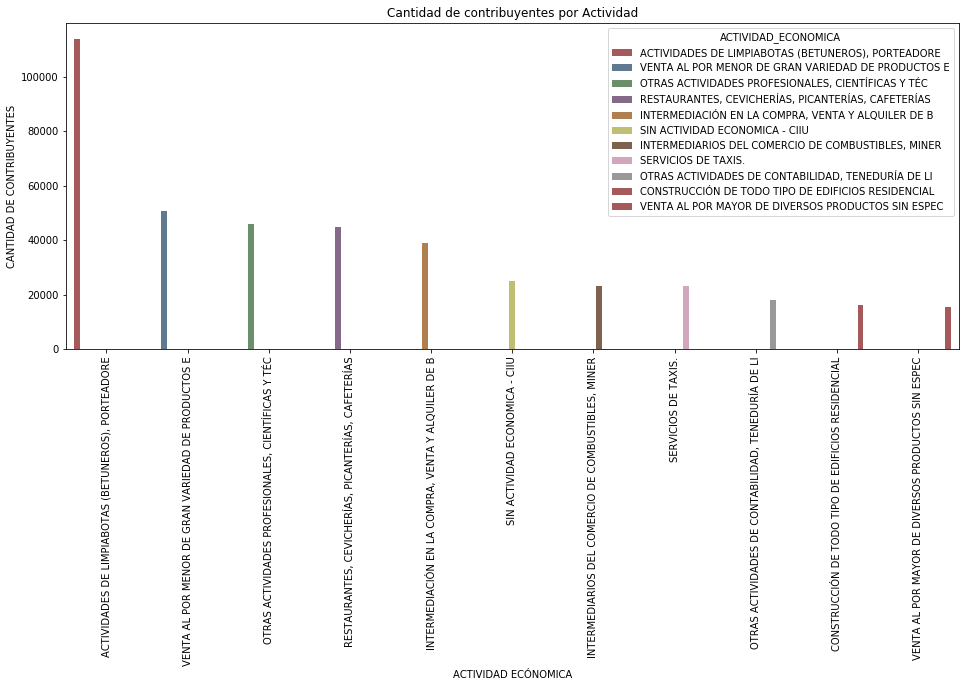

In [57]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA_MIN', data=top10_cont,hue="ACTIVIDAD_ECONOMICA",palette=sns.color_palette("Set1", n_colors=10, desat=.5))
ax.set(ylabel='CANTIDAD DE CONTRIBUYENTES', title='Cantidad de contribuyentes por Actividad',xlabel="ACTIVIDAD ECÓNOMICA")
ax.set_xticklabels(labels=top10_cont['ACTIVIDAD_ECONOMICA'],rotation=90)

In [58]:
df3 = df3.dropna(subset=['FECHA_INICIO_ACTIVIDADES'])
df3['FECHA_INICIO_ACTIVIDADES'] = pd.to_datetime(df3['FECHA_INICIO_ACTIVIDADES'])
df3['fecha_ano'] = df3['FECHA_INICIO_ACTIVIDADES'].dt.year
def mapper(month):
    return month.strftime('%b') 
df3['fecha_mes'] = df3['FECHA_INICIO_ACTIVIDADES'].apply(mapper)

/media/mdleiton/Respaldo/repositorios/AED/env/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


6

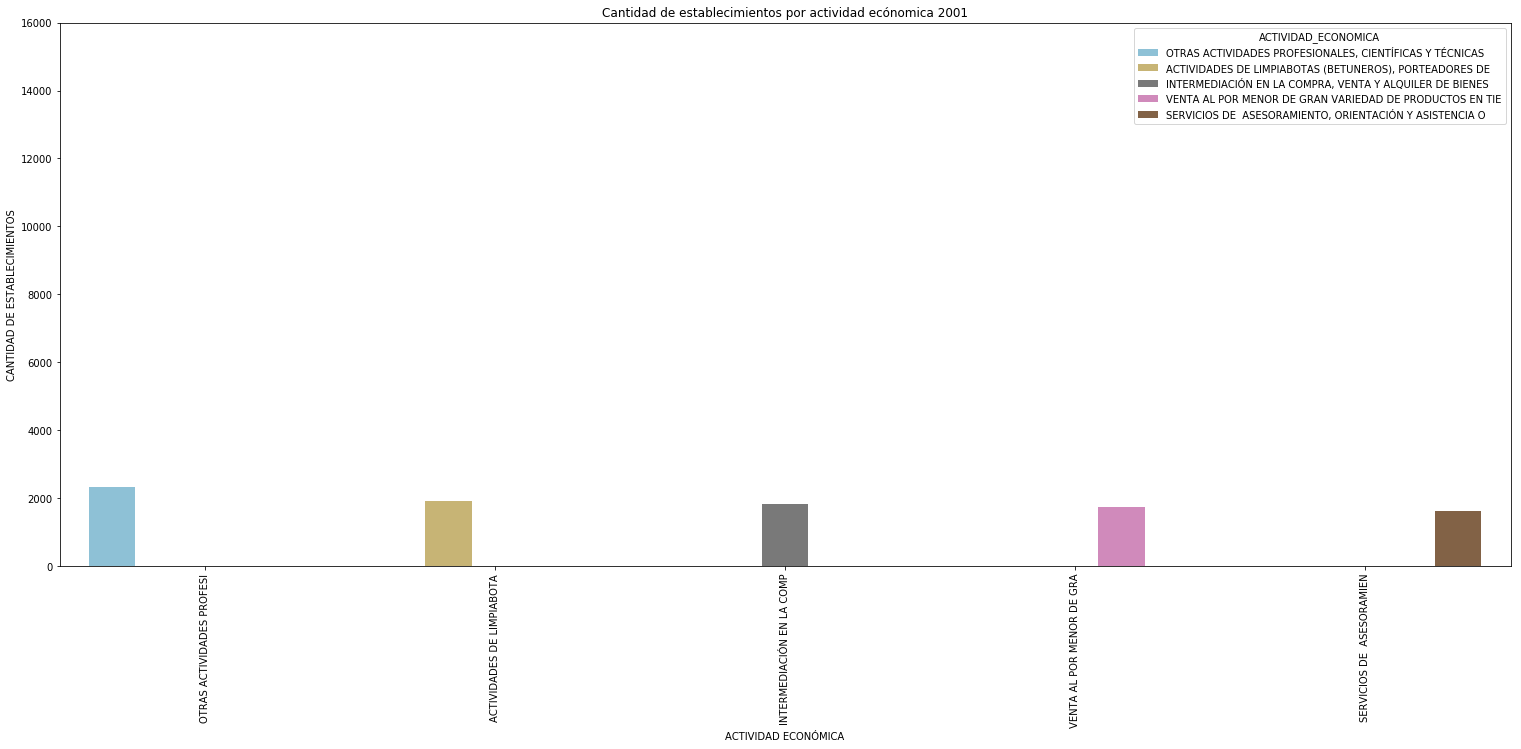

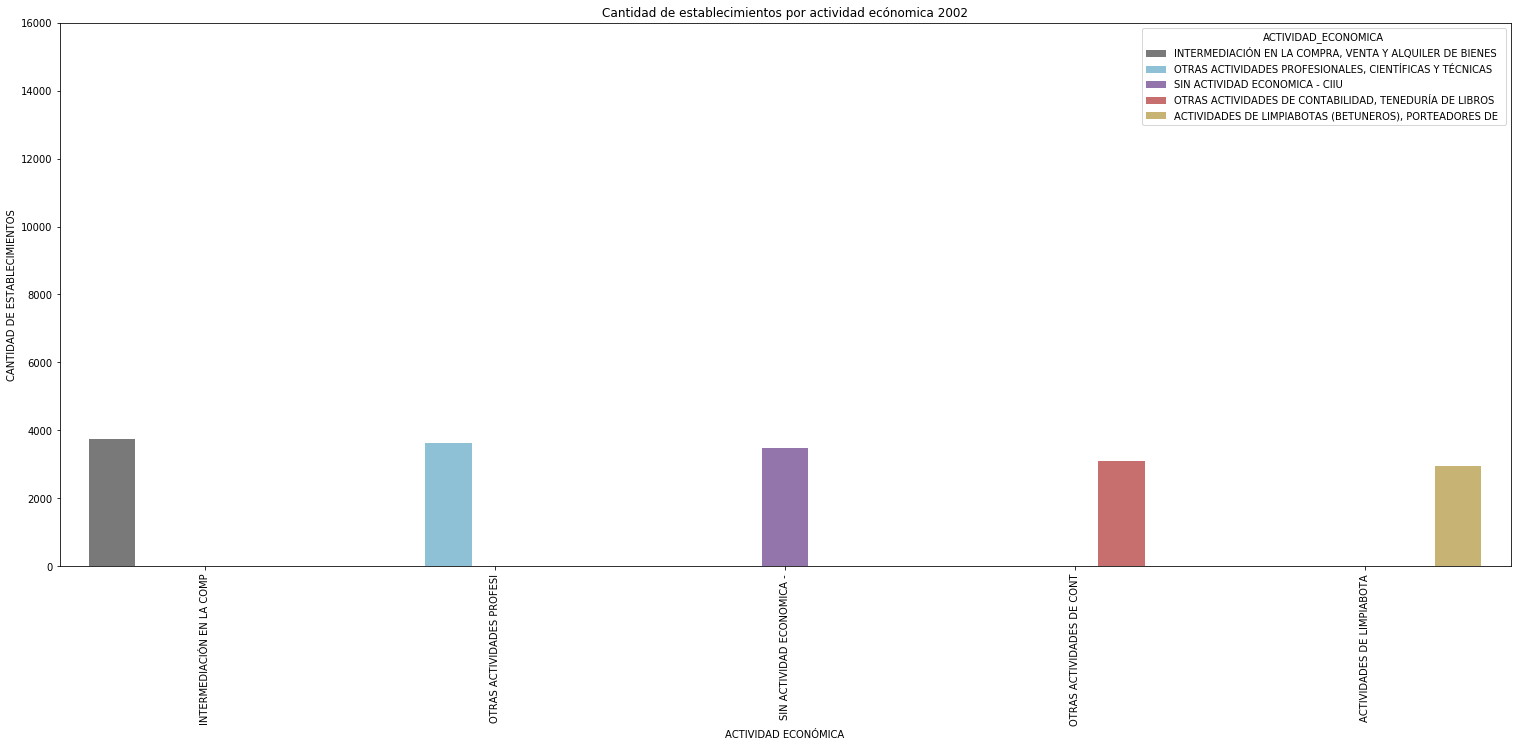

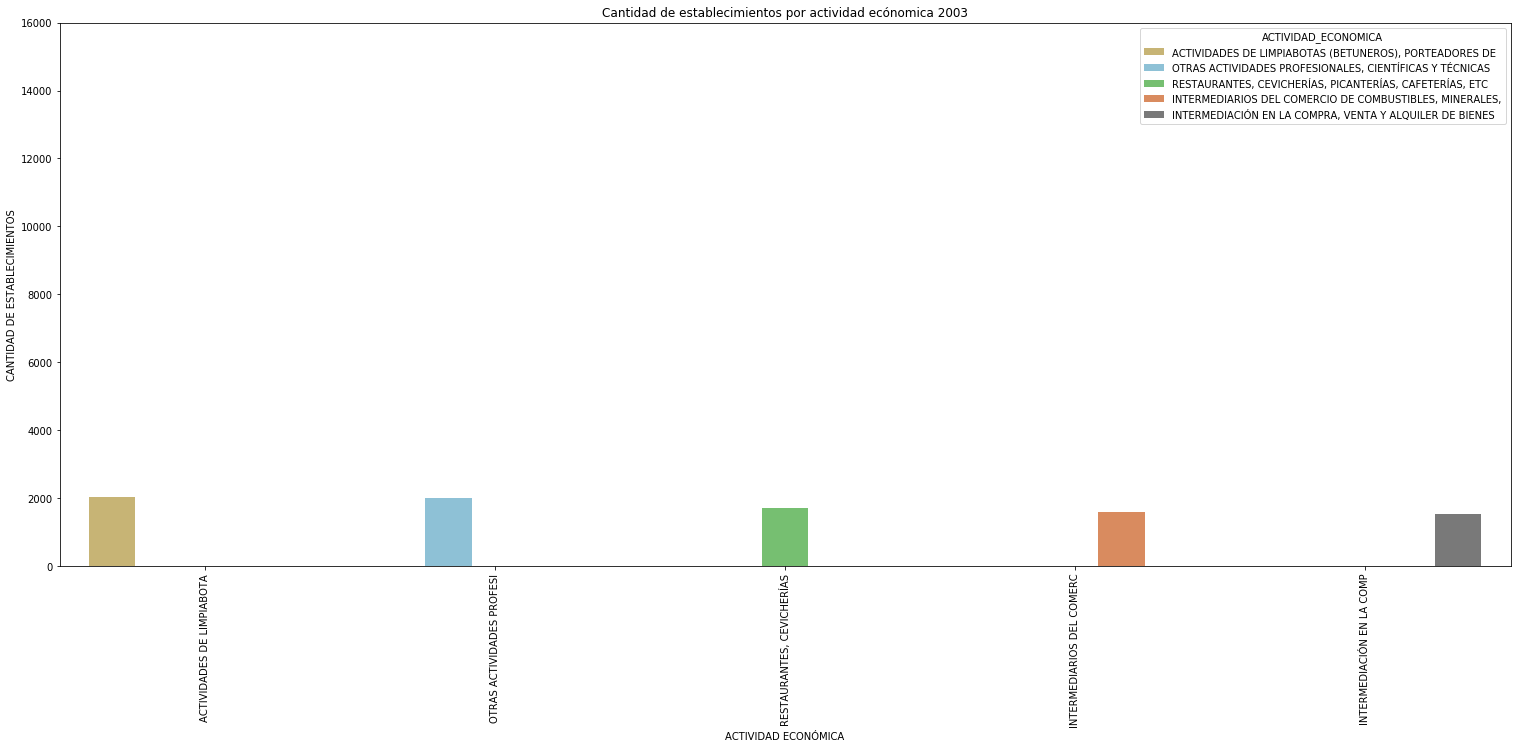

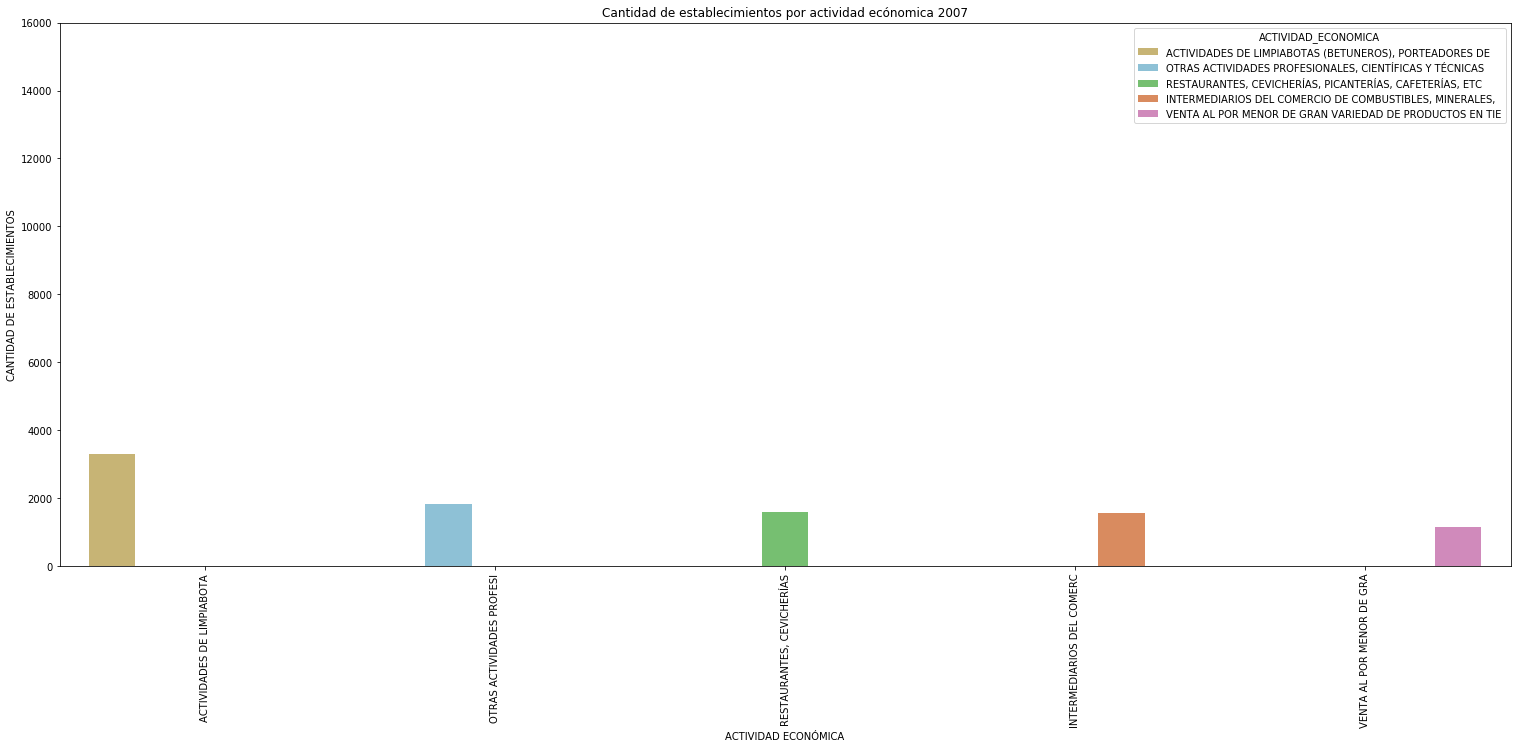

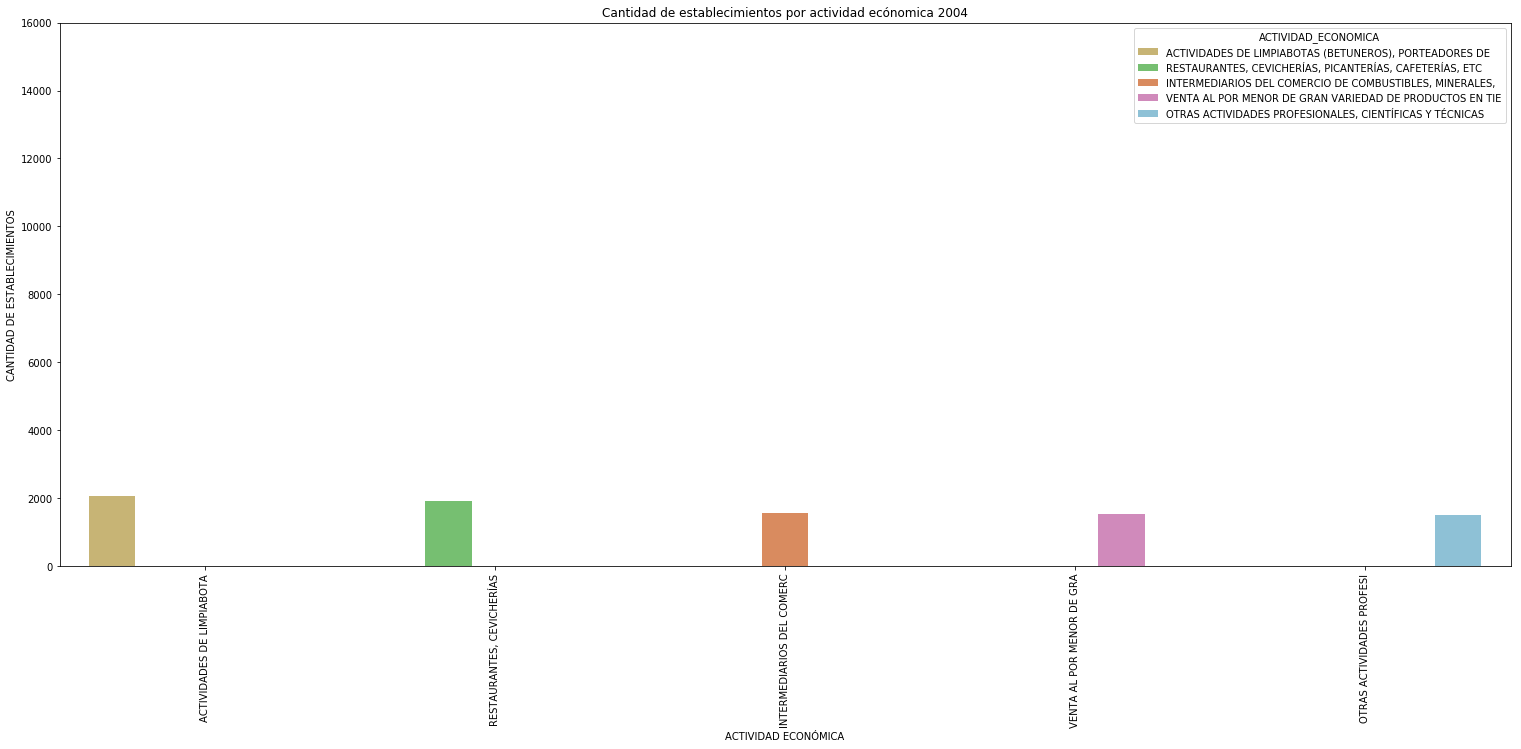

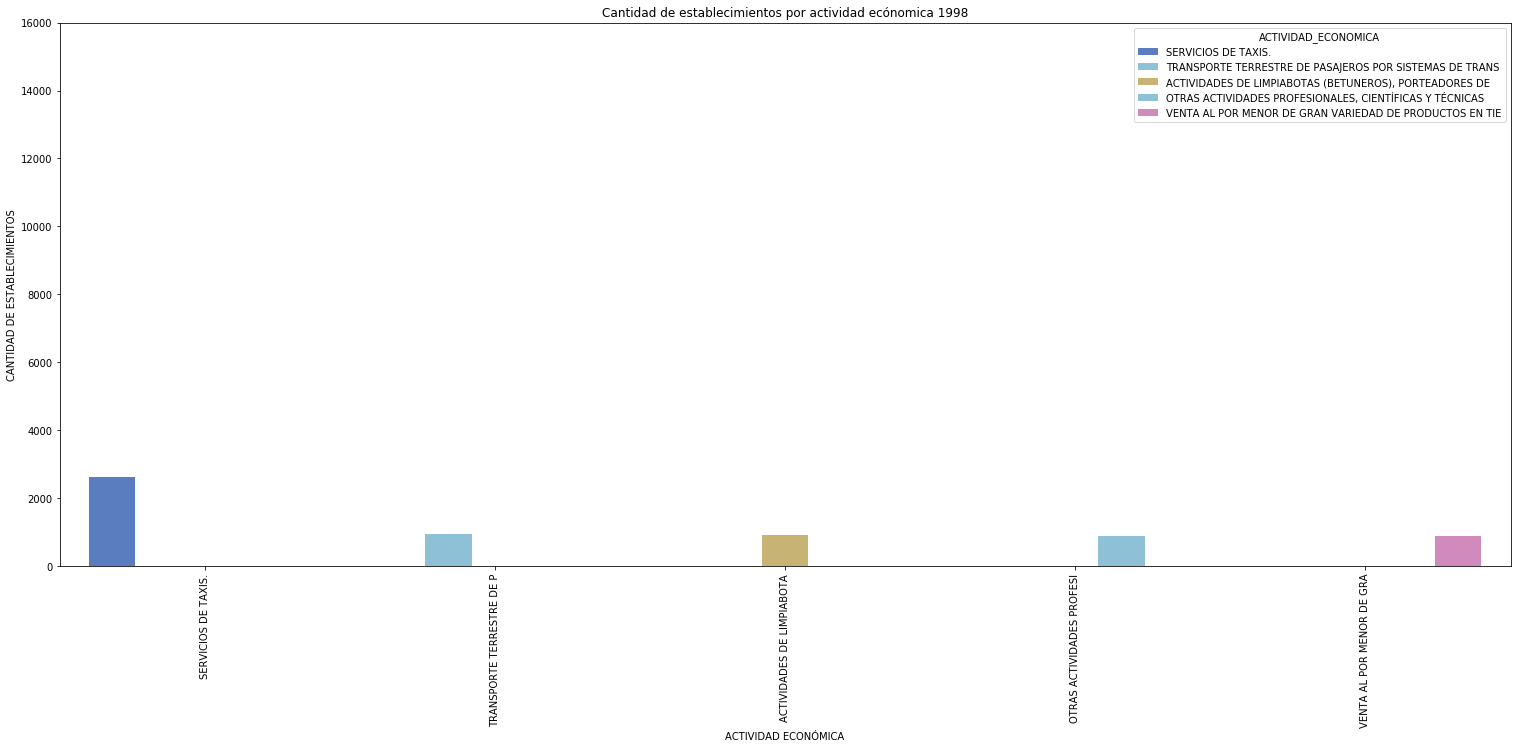

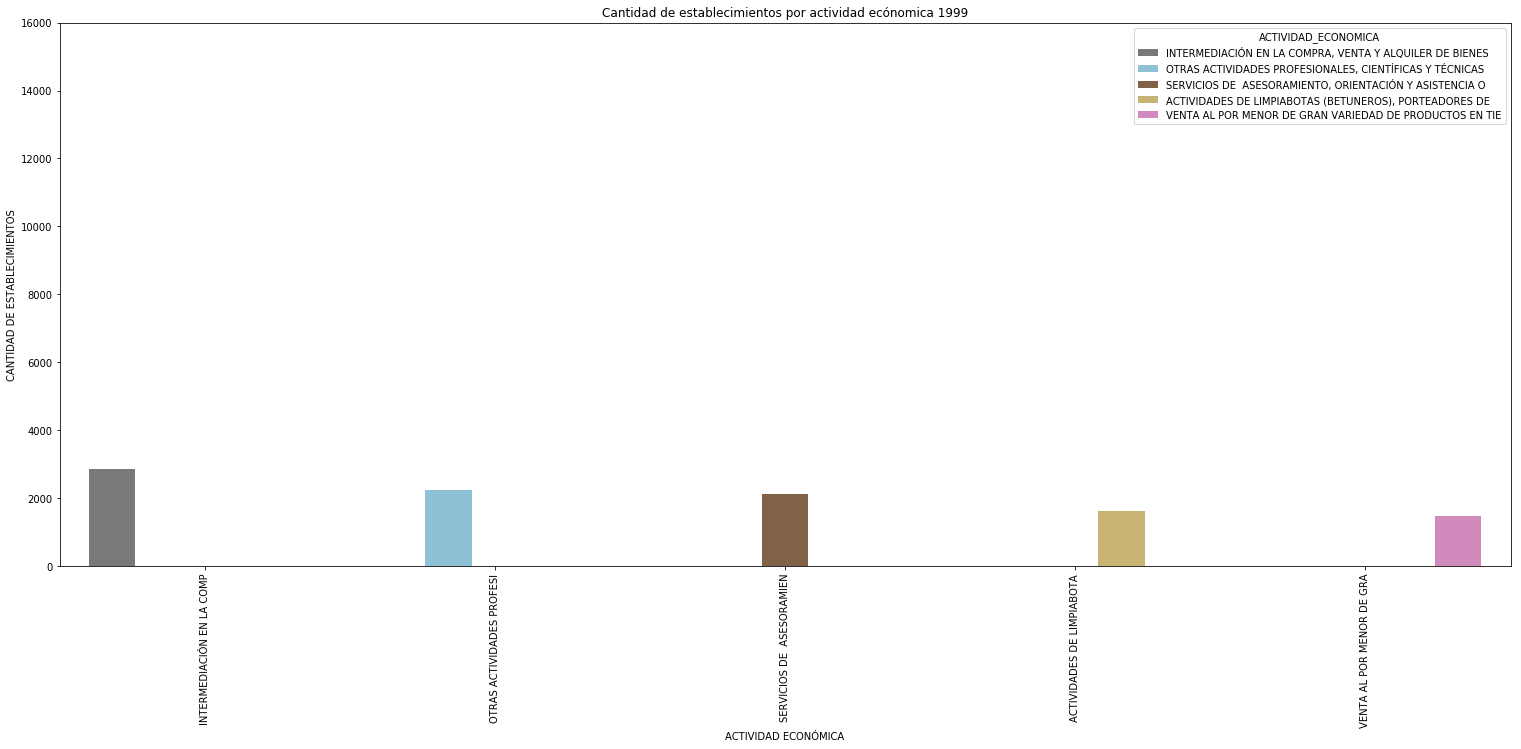

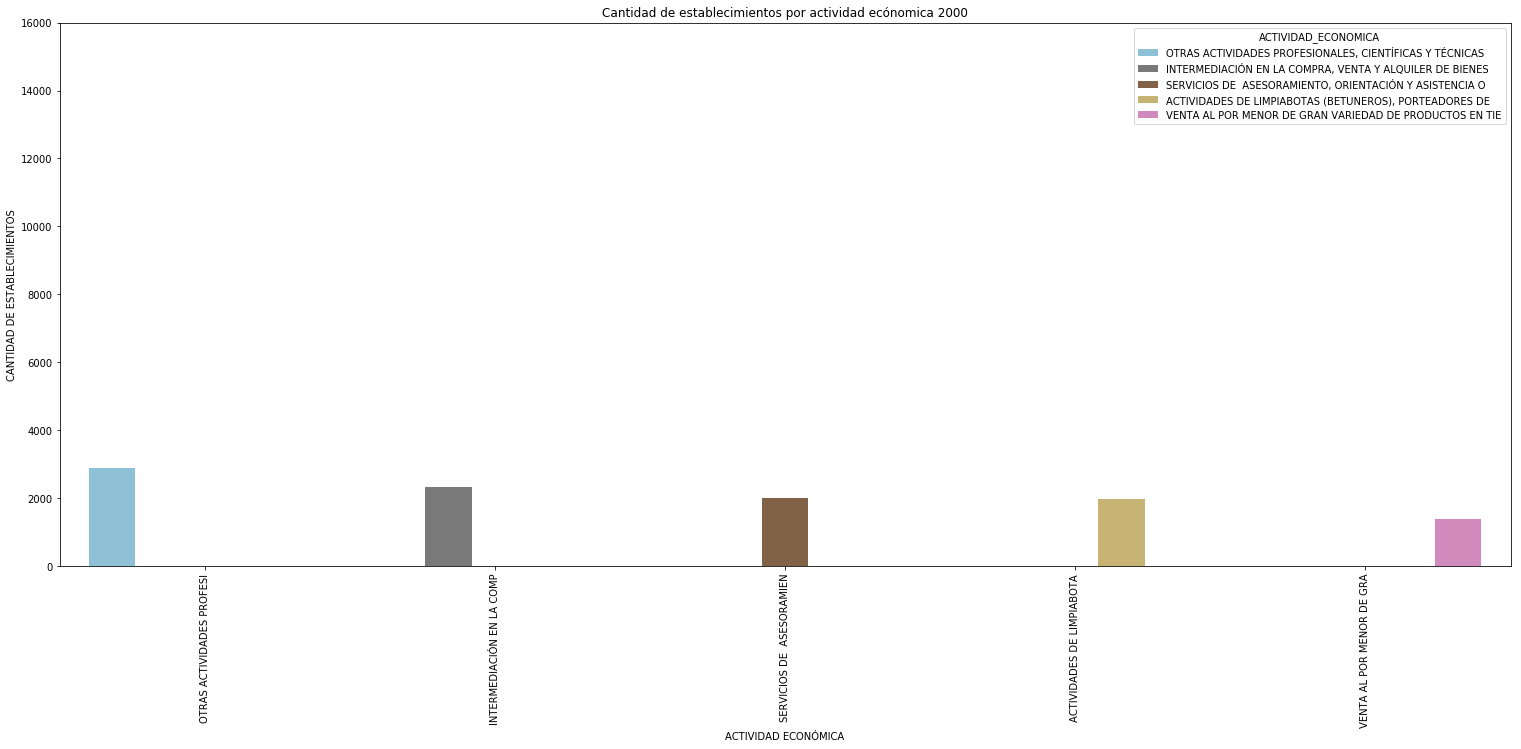

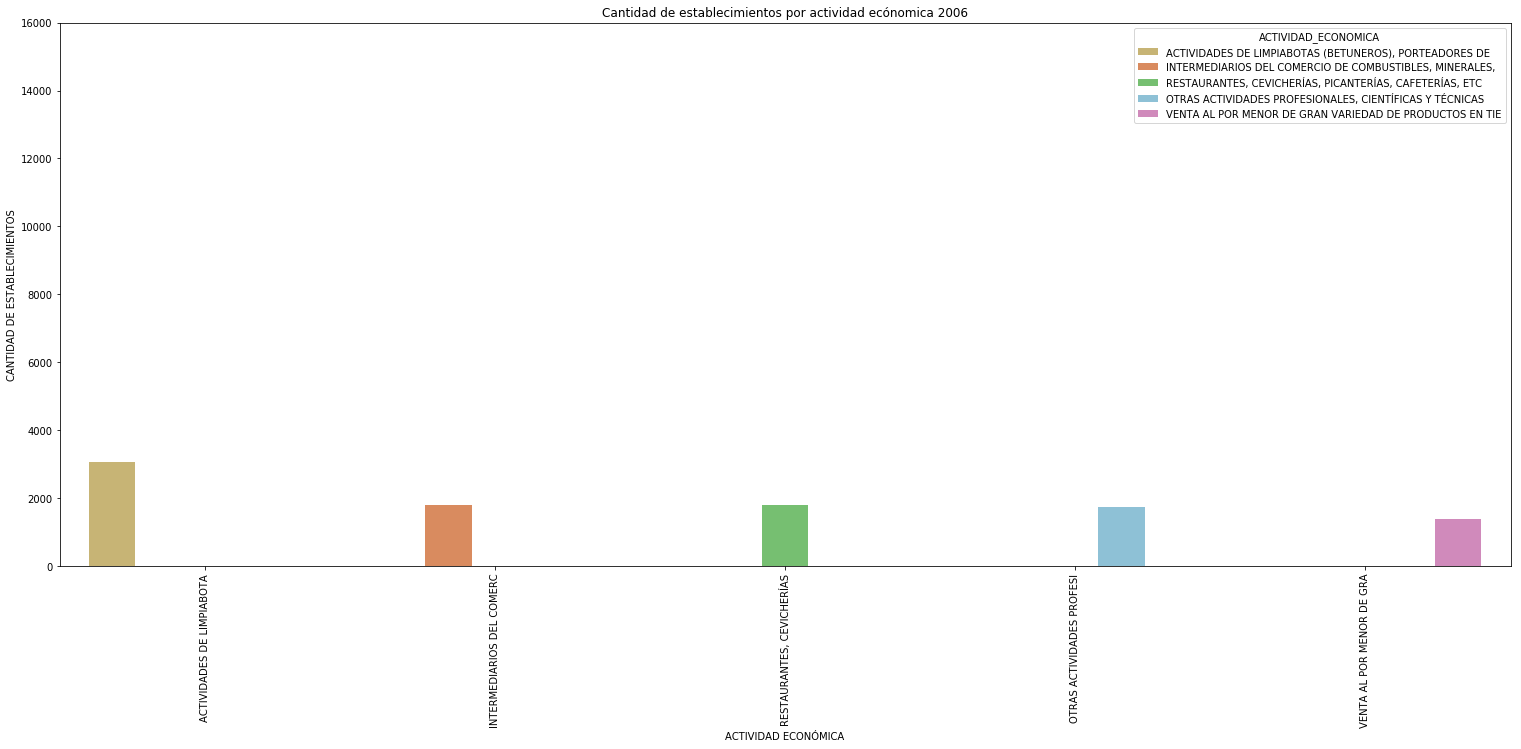

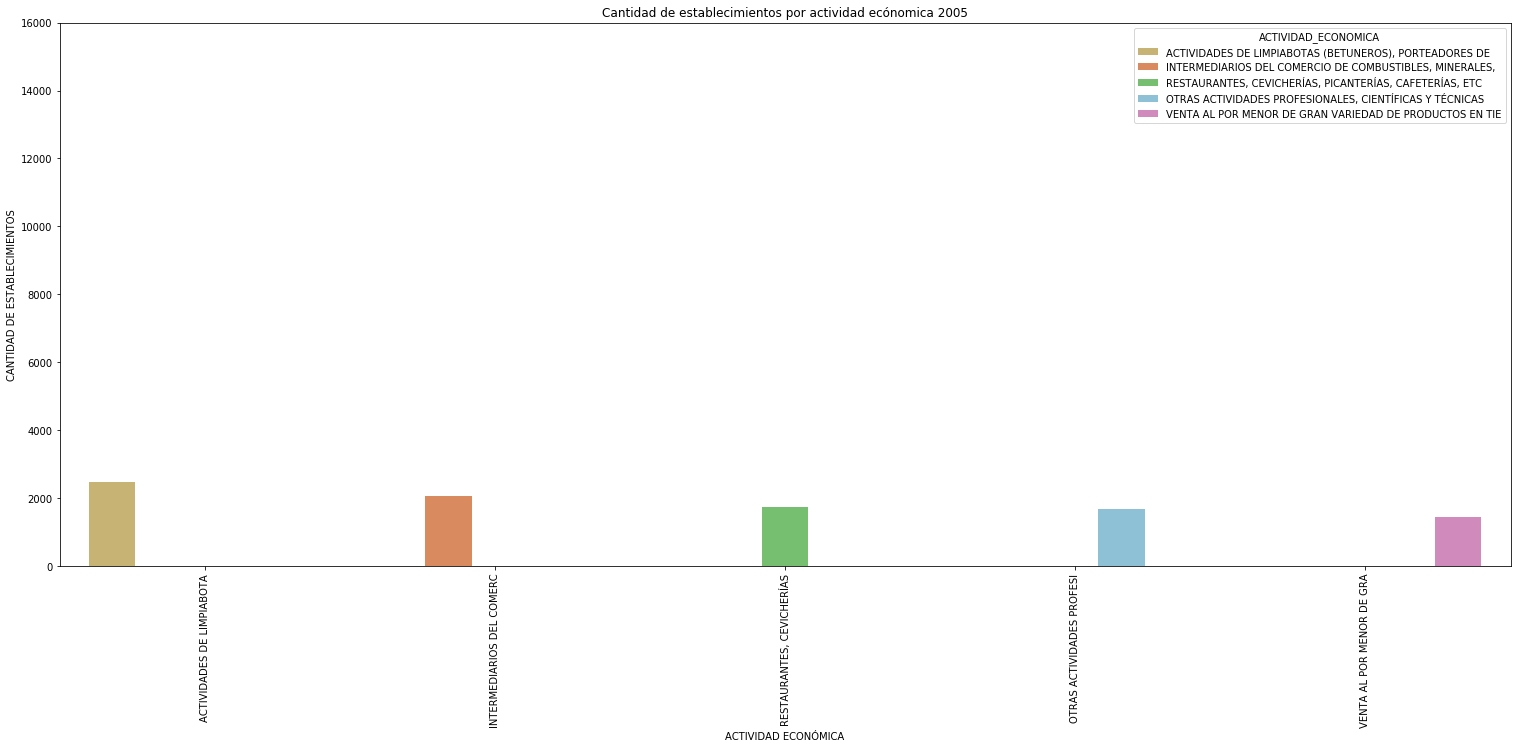

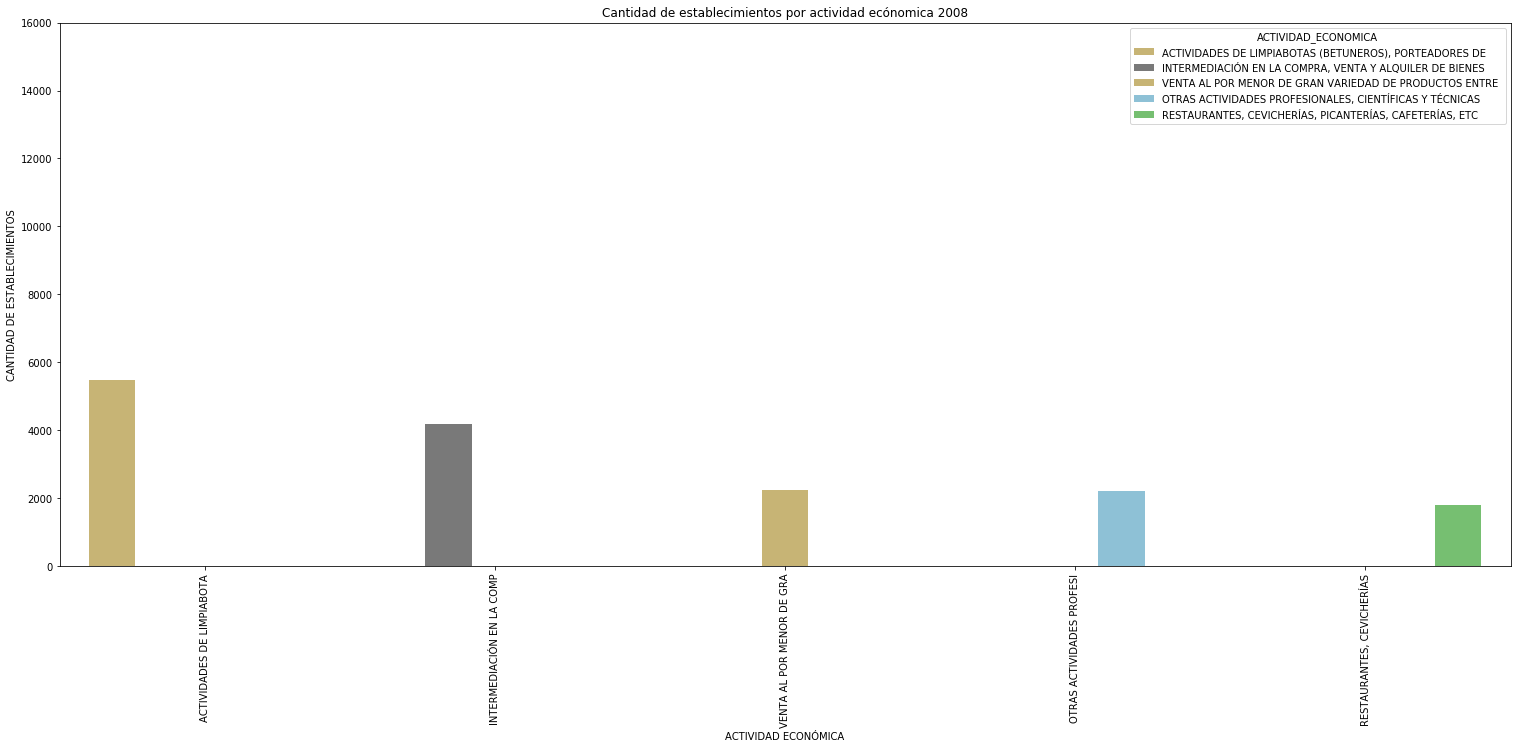

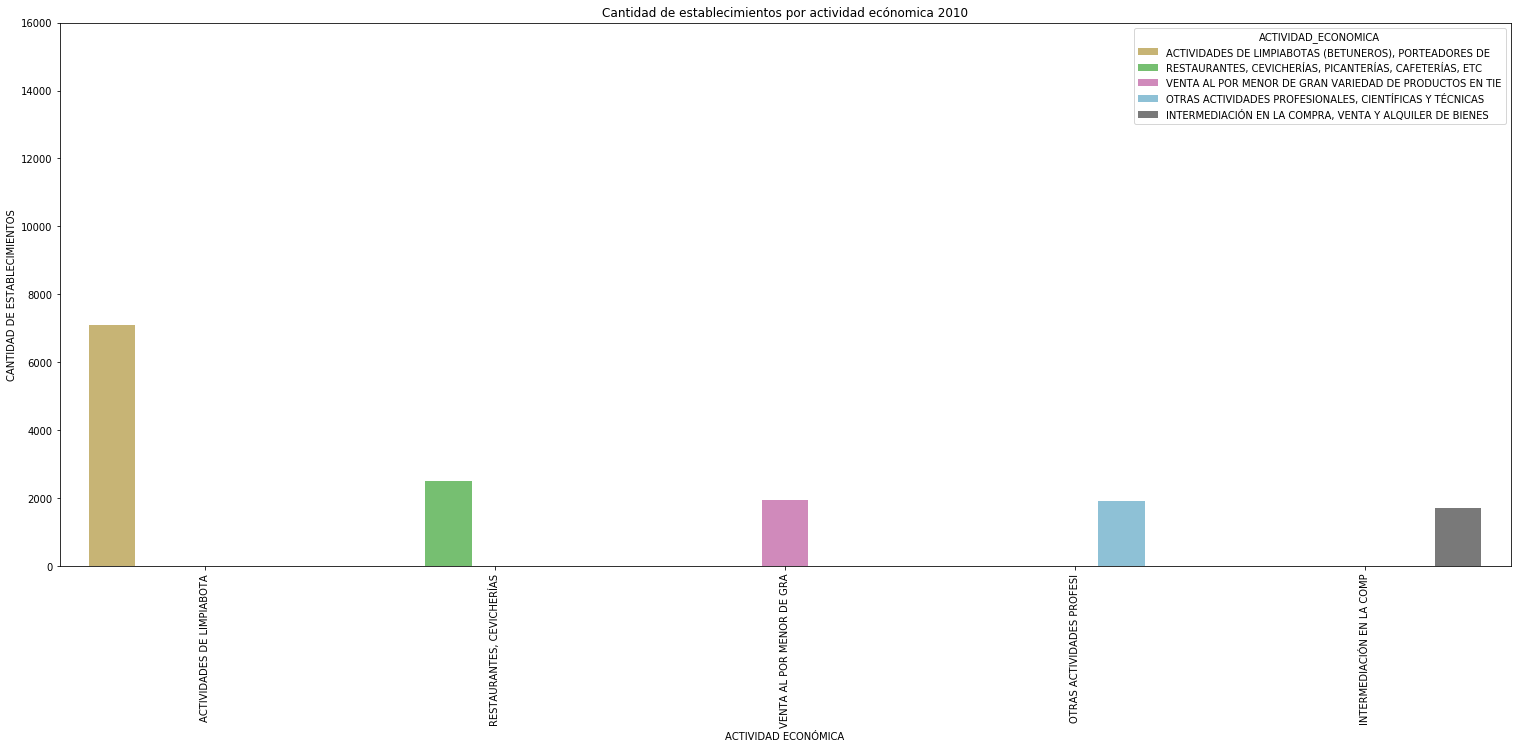

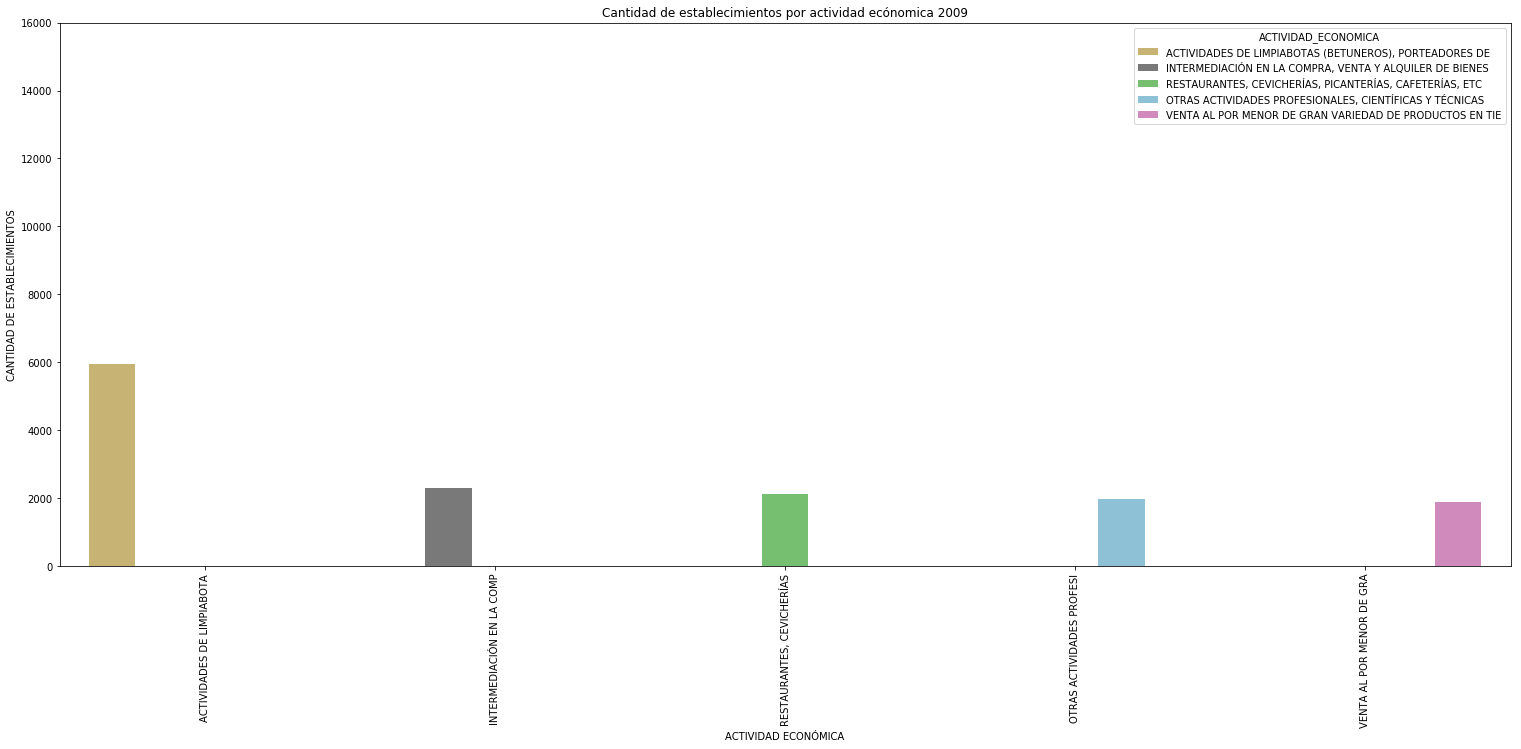

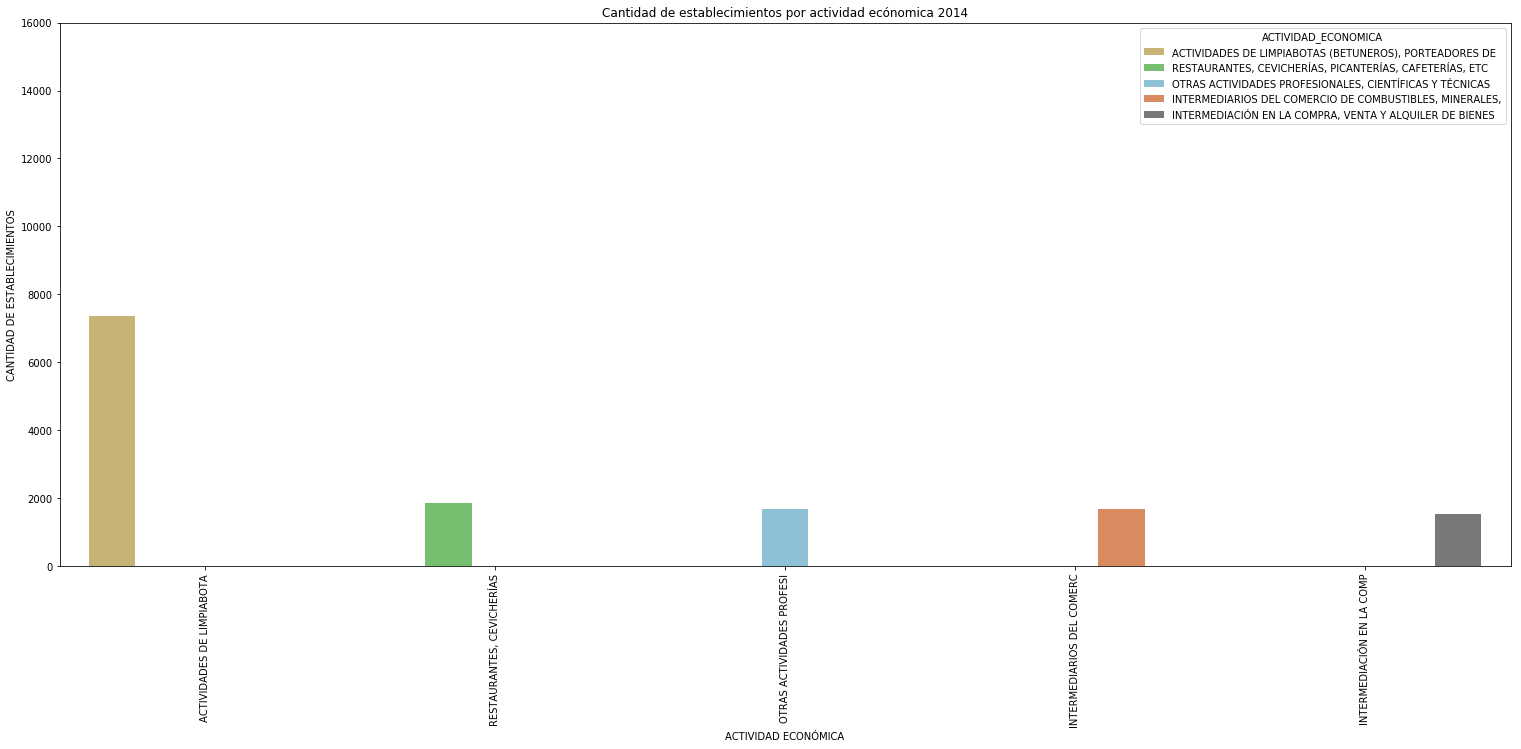

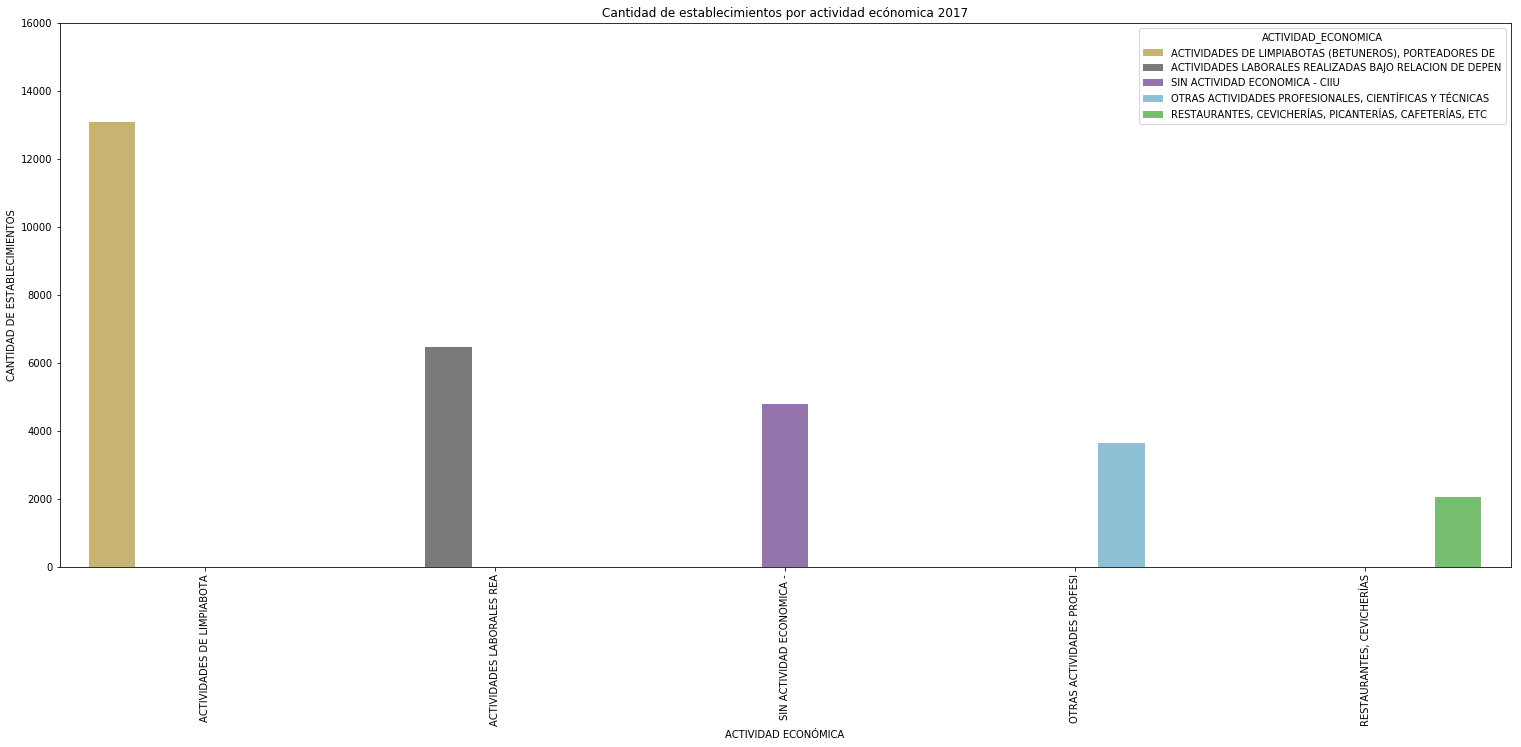

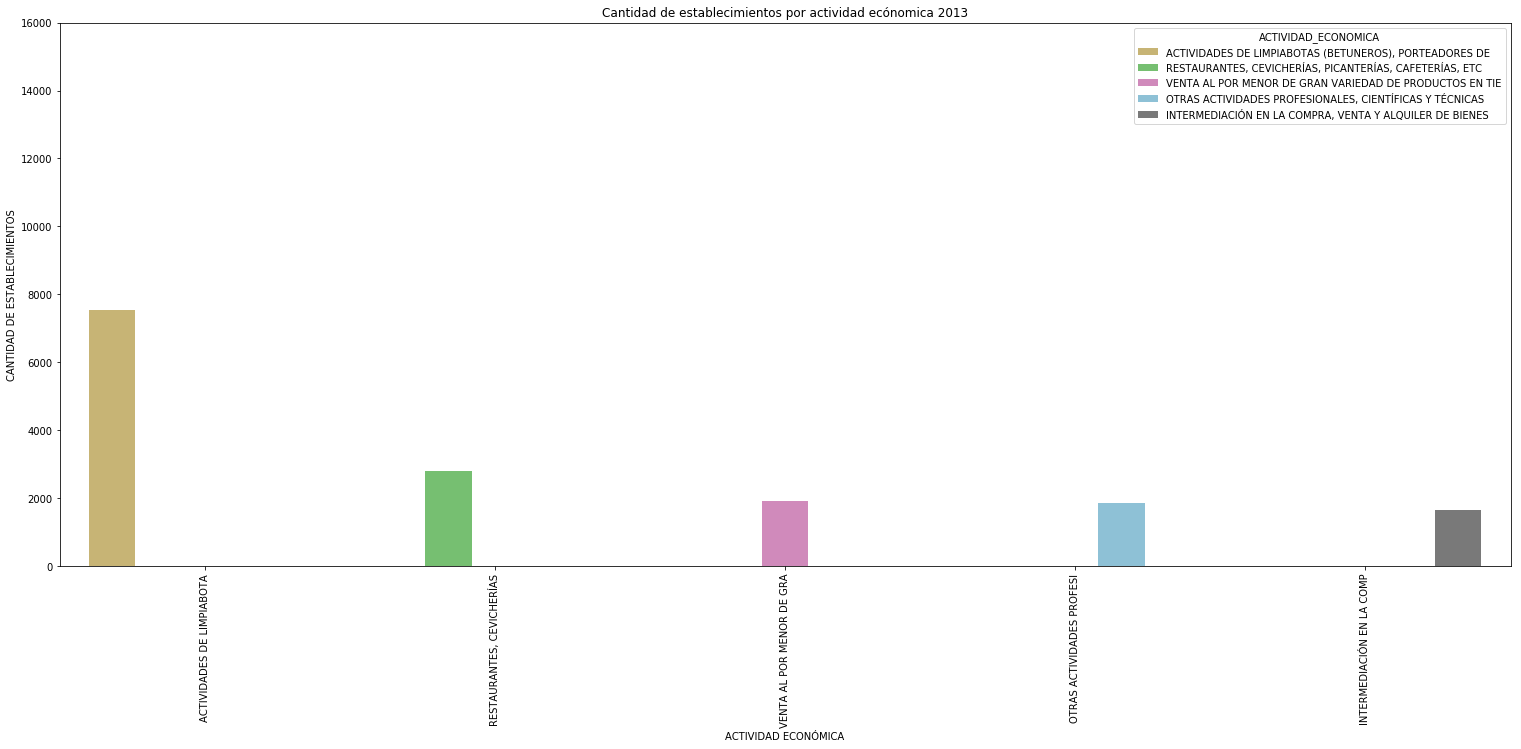

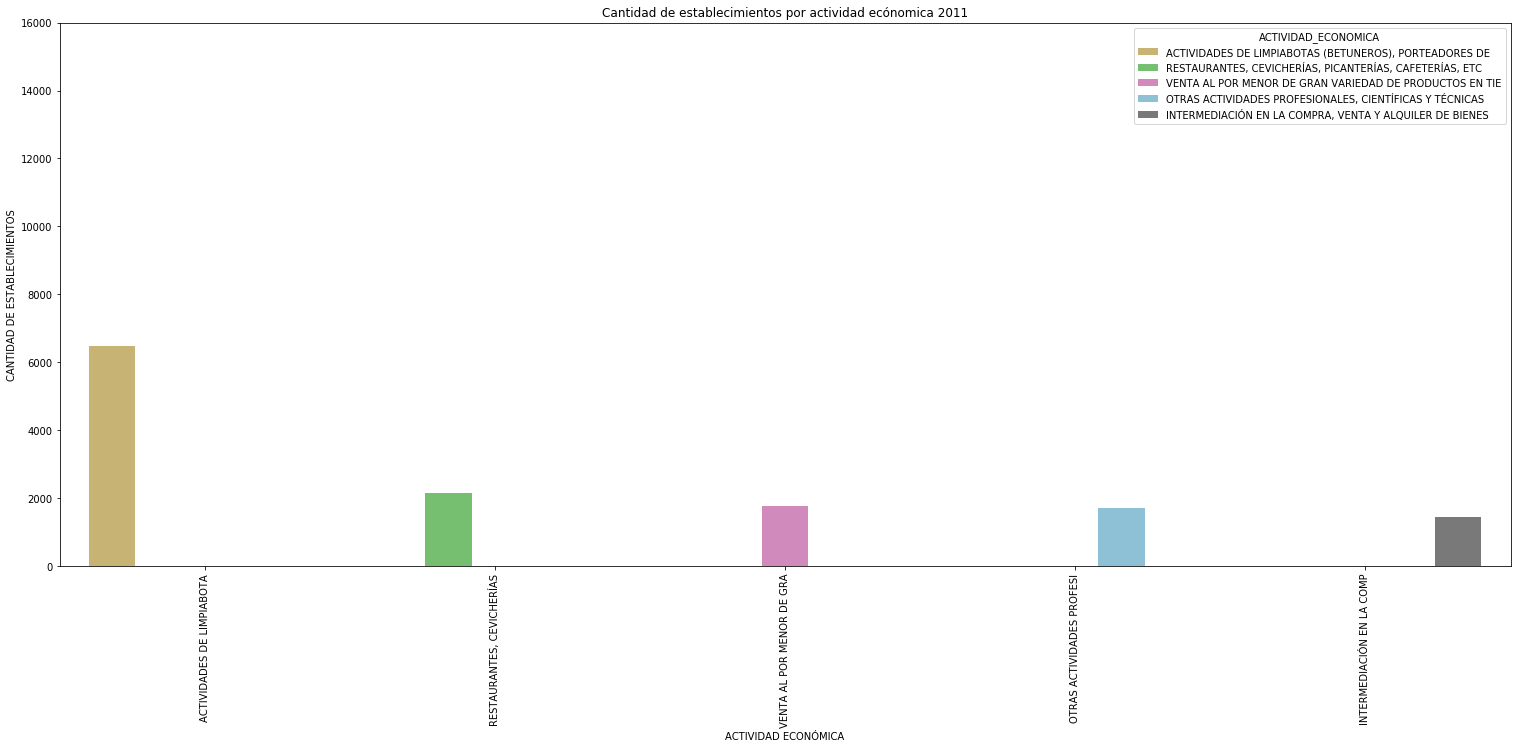

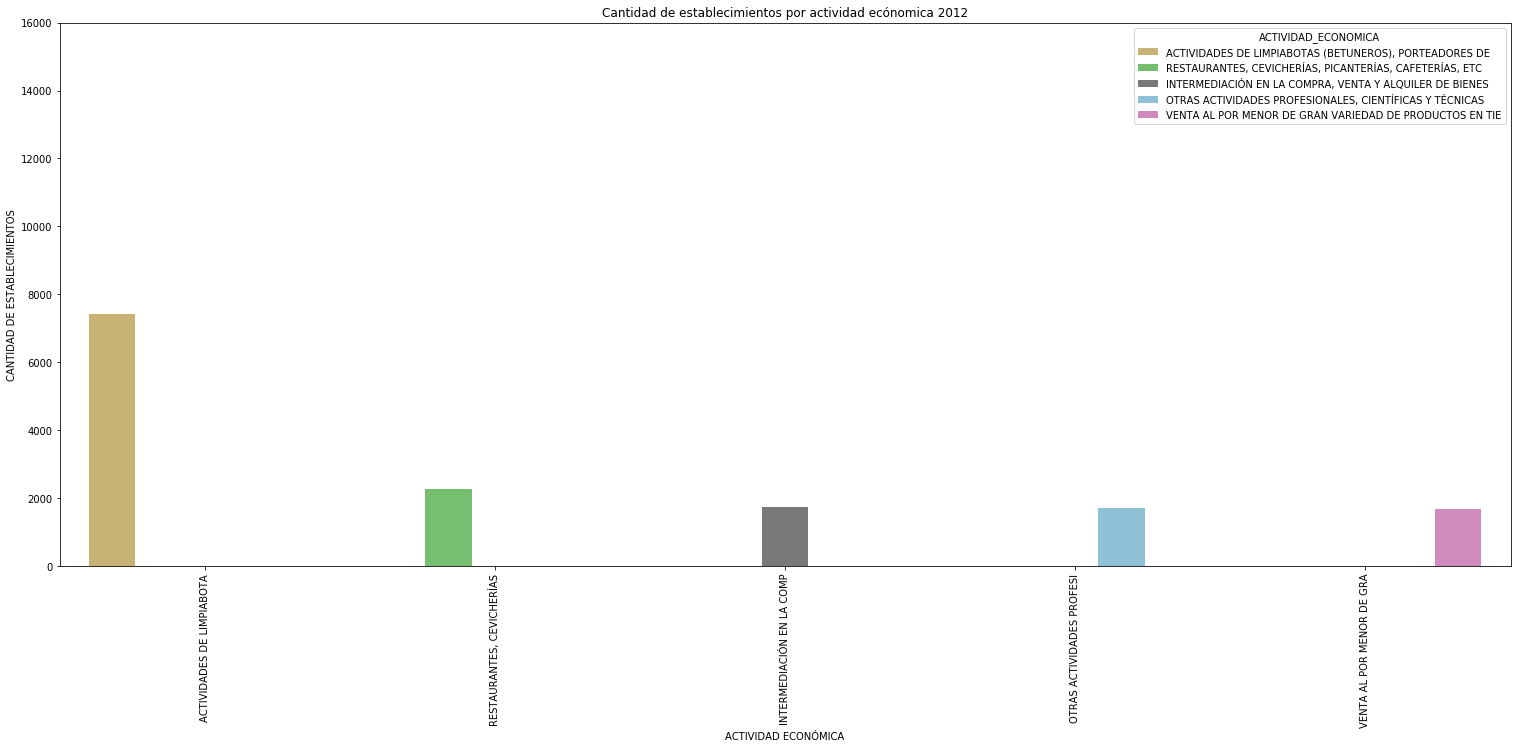

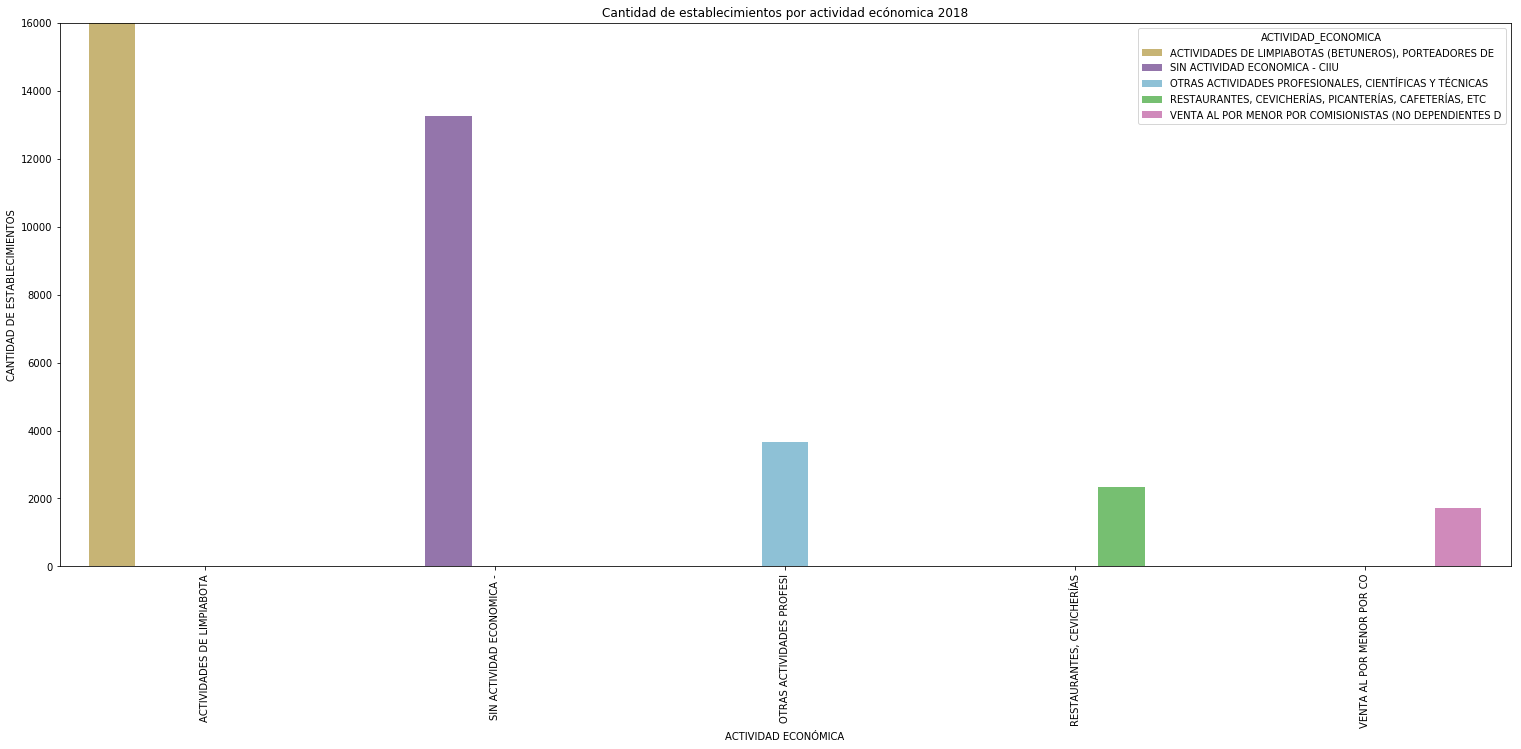

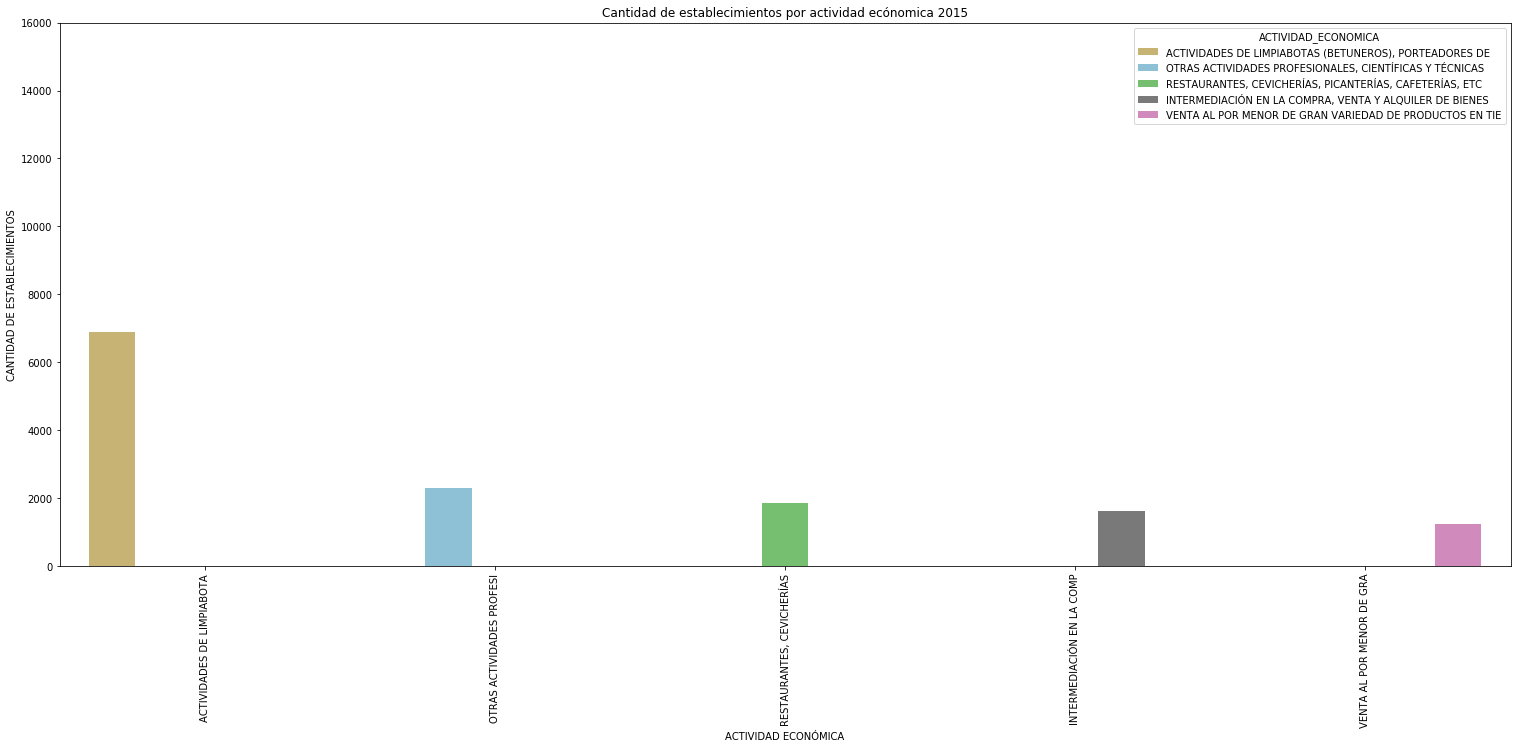

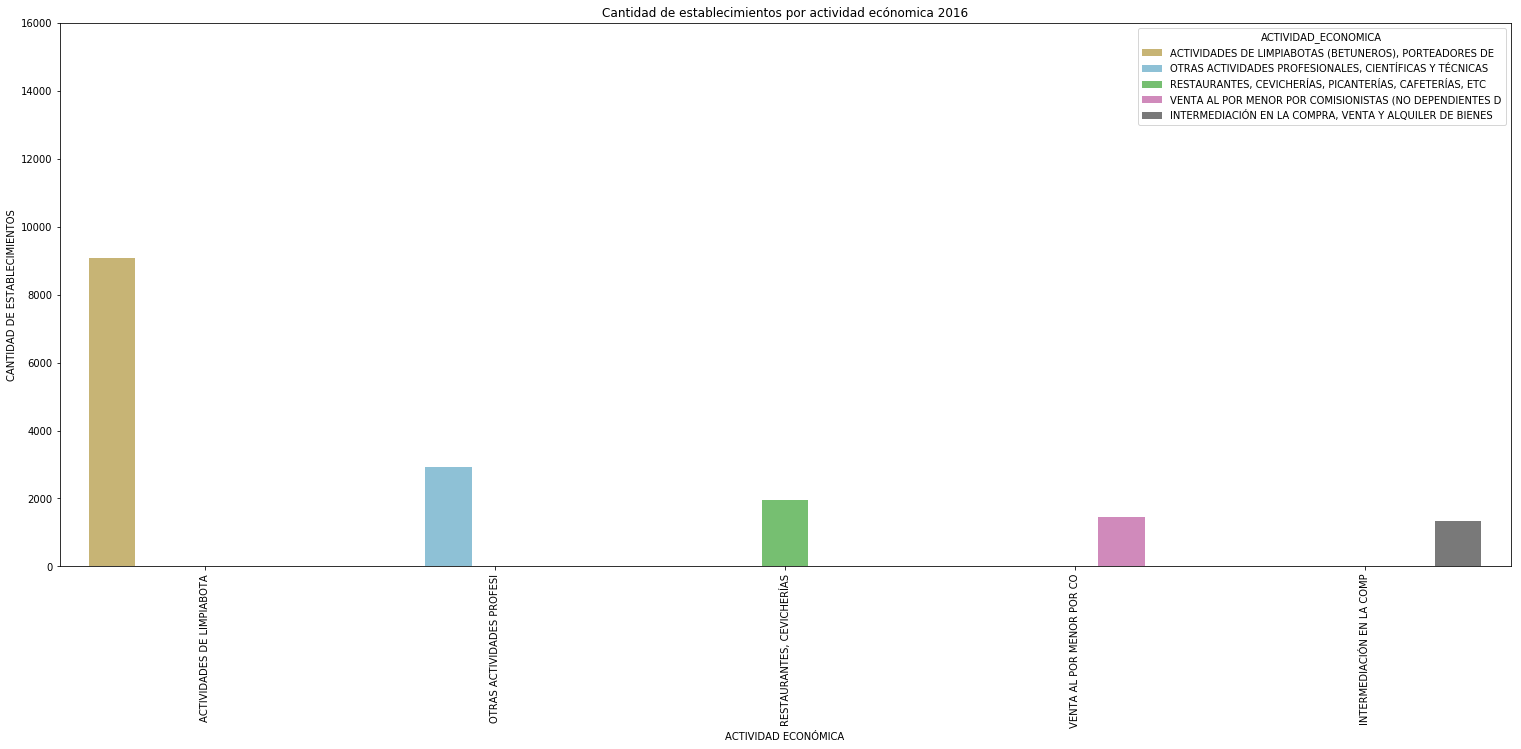

In [60]:
lista_colores = sns.color_palette("muted", n_colors=20, desat=1)
palette = dict(zip(top10['ACTIVIDAD_ECONOMICA'].head(1),"blue"))
dic = []
def por_actividad_mes(ano):
    plt.figure(figsize=(26, 10))
    df_x = df3[df3['fecha_ano']==ano ]
    top10 = df_x.groupby('ACTIVIDAD_ECONOMICA').size().to_frame('cantidad').sort_values(['cantidad'], ascending=False).reset_index()[:5]
    top10['ACTIVIDAD_ECONOMICA'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:55], axis=1)
    top10['ACTIVIDAD_ECONOMICA_MIN'] = top10.apply(lambda row: row['ACTIVIDAD_ECONOMICA'][:25], axis=1)
    for actividad in top10['ACTIVIDAD_ECONOMICA']:
        if actividad not in dic:
            dic.append(actividad)
            palette.update({actividad:lista_colores.pop()})
    ax = sns.barplot(y='cantidad', x='ACTIVIDAD_ECONOMICA_MIN',ci=None, data=top10,hue="ACTIVIDAD_ECONOMICA",palette=palette)
    ax.set(ylabel='CANTIDAD DE ESTABLECIMIENTOS',xlabel="ACTIVIDAD ECONÓMICA", title='Cantidad de establecimientos por actividad ecónomica '+ str(ano),ylim=(0, 16000))
    ax.set_xticklabels(labels=top10['ACTIVIDAD_ECONOMICA_MIN'],rotation=90)
    plt.savefig("CONTRIBUYENTES_X_ANO_"+str(ano)+".png")
df3 = df3[ (1998 <=df3['fecha_ano']) & (df3['fecha_ano']<=2018)]
for ano in df3['fecha_ano'].unique().tolist():
    por_actividad_mes(ano)
#convert -delay 30 *.png establecimiento_actividad_ano.gif
len(lista_colores)